In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# f = "/mnt/c/Users/tomasz/OneDrive - University of Edinburgh/model_RNAPI_matlab/20230112_termination_simulations/Data20230112/2023_1_12_13_15_58.mat"
# mat = scipy.io.loadmat(f)
# mat['Data'][0][0][10]

In [3]:
def parseMatOutput(filePath):
    names = ['sigma','outOfBound','rpa12Cleavage','minRange','RNAPbubble','hybridFile','saveHistOnly','nRuns','tMax','dt','structureFile','c','dist','v5end','addProb','vInt','preTermProb','preTermDist','backtrackingVelocity','rnt1Cleavage','structure2consider','structureStrength','hybridStrength','name']

    mat = scipy.io.loadmat(filePath)
    ### order ###
    # mids, rhoFull, dxAvgFull, structureFull, hybridFull, windingFull, backtrackingFull, backtrackingFullRaw, collistionsFull, collisionsFullRaw
    
    #output full
    output_full = pd.DataFrame(index=mat['Data'][0][0][0][0])
    output = pd.DataFrame()
    params = pd.DataFrame(index=names)

    for n,i in enumerate(mat['Data'][0][0][1]): #rhoFull
        output_full['data_'+str(n)] = i
    
    #output
    output['nParticles'] = [i[0] for i in mat['Data'][0][0][10]]
    output['xEnd'] = [i[0] for i in mat['Data'][0][0][11]]
    output['xEndPremature'] = [i[0] for i in mat['Data'][0][0][12]]
    output['tTaken'] = [pd.Series(i).mean() for i in mat['Data'][0][0][13].T]
    
    #parameters  
    param_temp = [i[0] for i in mat['Data'][0][0][14][0][0]]
    param_clean = []
    for i in param_temp:
        if type(i) == np.ndarray:           
            param_clean.append(i[0])
        else:
            param_clean.append(i)

    params['run'] = param_clean
   
    return output, params, output_full.mean(1)



path = "/mnt/c/Users/tomasz/OneDrive - University of Edinburgh/model_RNAPI_matlab/20230112_termination_simulations/Data20230113/"

df00_output = pd.DataFrame()
df01_plots = pd.DataFrame()
for f in os.listdir(path):
    if f.endswith(".mat"):
        output, params, output_full = parseMatOutput(path+f)

        params = params.to_dict()['run']
        
        #coefficient to multiply nRuns 
        if params['tMax'] == 6000:
            coef = (150 * 0.5) / params['nRuns']
        else:
            exit("tMax different than 6000")
        
        data = {
            'time'        : params['tMax'],
            'c'           : params['c'],
            'dist'        : params['dist'],
            'v5end'       : params['v5end'],
            'addProb'     : params['addProb'],
            'vInt'        : params['vInt'],
            'preTermProb' : params['preTermProb'],
            'preTermDist' : params['preTermDist'],
            'nParticles'    : output['nParticles'].mean(),
            'xEnd'          : output['xEnd'].sum() * coef,
            'xEndPremature' : output['xEndPremature'].sum() * coef,
            'tTaken'        : output['tTaken'].mean()
        }
               
        df00_output[params['name']] = pd.Series(data)
        df01_plots[params['name']] = output_full
                
df00_output

discrete_0.1  discrete_0.2   discrete_0.3   discrete_0.4  \
time            6000.000000   6000.000000    6000.000000    6000.000000   
c                  0.000000      0.000000       0.000000       0.000000   
dist               0.000000      0.000000       0.000000       0.000000   
v5end              0.000000      0.000000       0.000000       0.000000   
addProb            0.100000      0.200000       0.300000       0.400000   
vInt              50.000000     50.000000      50.000000      50.000000   
preTermProb        0.000000      0.000000       0.000000       0.000000   
preTermDist        0.000000      0.000000       0.000000       0.000000   
nParticles        13.390750     24.859500      34.819437      43.351312   
xEnd           40673.437500  75304.687500  105323.437500  130875.000000   
xEndPremature      0.000000      0.000000       0.000000       0.000000   
tTaken           146.475871    146.717822     146.961995     147.235247   

                discrete_0.9   discrete_1.0  discrete_0.8_term_0  \
time             6000.000000    6000.000000          6000.000000   
c                   0.000000       0.000000             0.000000   
dist                0.000000       0.000000             0.000000   
v5end               0.000000       0.000000             0.000000   
addProb             0.900000       1.000000             0.800000   
vInt               50.000000      50.000000            50.000000   
preTermProb         0.000000       0.000000             0.000000   
preTermDist         0.000000       0.000000          6750.000000   
nParticles         77.282312      81.566938            70.816500   
xEnd           223073.437500  236517.187500        208785.937500   
xEndPremature       0.000000       0.000000             0.000000   
tTaken            148.523856     148.772313           148.260551   

               discrete_0.8_term_0.0001   discrete_0.5  \
time                        6000.000000    6000.000000   
c                              0.000000       0.000000   
dist                           0.000000       0.000000   
v5end                          0.000000       0.000000   
addProb                        0.800000       0.500000   
vInt                          50.000000      50.000000   
preTermProb                    0.000100       0.000000   
preTermDist                 6750.000000       0.000000   
nParticles                    70.876062      51.289812   
xEnd                      208926.562500  154696.875000   
xEndPremature                 18.750000       0.000000   
tTaken                       148.262404     147.487927   

               discrete_0.8_term_0.001  ...  fullnoLTRpreElong_0.8_term_0.4  \
time                       6000.000000  ...                     6000.000000   
c                             0.000000  ...                      500.000000   
dist                          0.000000  ...                        0.000000   
v5end                         0.000000  ...                        0.000000   
addProb                       0.800000  ...                        0.800000   
vInt                         50.000000  ...                       50.000000   
preTermProb                   0.001000  ...                        0.400000   
preTermDist                6750.000000  ...                     2000.000000   
nParticles                   71.492687  ...                       47.249875   
xEnd                     209160.937500  ...                   182095.312500   
xEndPremature               257.812500  ...                    19003.125000   
tTaken                      148.257028  ...                      114.046675   

               fullnoLTRpreElong_0.8_term_0.5  fullnoLTRpreElong_0.8_term_0.6  \
time                              6000.000000                     6000.000000   
c                                  500.000000                      500.000000   
dist                                 0.000000                        0.000000   
v5end                                0.000000  

In [4]:
#processivity
df00_output = df00_output.T
df00_output['processivity'] = df00_output['xEnd'] / (df00_output['xEnd'] + df00_output['xEndPremature'])
df00_output = df00_output.T
df00_output

discrete_0.1  discrete_0.2   discrete_0.3   discrete_0.4  \
time            6000.000000   6000.000000    6000.000000    6000.000000   
c                  0.000000      0.000000       0.000000       0.000000   
dist               0.000000      0.000000       0.000000       0.000000   
v5end              0.000000      0.000000       0.000000       0.000000   
addProb            0.100000      0.200000       0.300000       0.400000   
vInt              50.000000     50.000000      50.000000      50.000000   
preTermProb        0.000000      0.000000       0.000000       0.000000   
preTermDist        0.000000      0.000000       0.000000       0.000000   
nParticles        13.390750     24.859500      34.819437      43.351312   
xEnd           40673.437500  75304.687500  105323.437500  130875.000000   
xEndPremature      0.000000      0.000000       0.000000       0.000000   
tTaken           146.475871    146.717822     146.961995     147.235247   
processivity       1.000000      1.000000       1.000000       1.000000   

                discrete_0.9   discrete_1.0  discrete_0.8_term_0  \
time             6000.000000    6000.000000          6000.000000   
c                   0.000000       0.000000             0.000000   
dist                0.000000       0.000000             0.000000   
v5end               0.000000       0.000000             0.000000   
addProb             0.900000       1.000000             0.800000   
vInt               50.000000      50.000000            50.000000   
preTermProb         0.000000       0.000000             0.000000   
preTermDist         0.000000       0.000000          6750.000000   
nParticles         77.282312      81.566938            70.816500   
xEnd           223073.437500  236517.187500        208785.937500   
xEndPremature       0.000000       0.000000             0.000000   
tTaken            148.523856     148.772313           148.260551   
processivity        1.000000       1.000000             1.000000   

               discrete_0.8_term_0.0001   discrete_0.5  \
time                        6000.000000    6000.000000   
c                              0.000000       0.000000   
dist                           0.000000       0.000000   
v5end                          0.000000       0.000000   
addProb                        0.800000       0.500000   
vInt                          50.000000      50.000000   
preTermProb                    0.000100       0.000000   
preTermDist                 6750.000000       0.000000   
nParticles                    70.876062      51.289812   
xEnd                      208926.562500  154696.875000   
xEndPremature                 18.750000       0.000000   
tTaken                       148.262404     147.487927   
processivity                   0.999910       1.000000   

               discrete_0.8_term_0.001  ...  fullnoLTRpreElong_0.8_term_0.4  \
time                       6000.000000  ...                     6000.000000   
c                             0.000000  ...                      500.000000   
dist                          0.000000  ...                        0.000000   
v5end                         0.000000  ...                        0.000000   
addProb                       0.800000  ...                        0.800000   
vInt                         50.000000  ...                       50.000000   
preTermProb                   0.001000  ...                        0.400000   
preTermDist                6750.000000  ...                     2000.000000   
nParticles                   71.492687  ...                       47.249875   
xEnd                     209160.937500  ...                   182095.312500   
xEndPremature               257.812500  ...                    19003.125000   
tTaken                      148.257028  ...                      114.046675   
processivity                  0.998769  ...                        0.905503   

               fullnoLTRpreElong_0.8_term_0.5  fullnoLTRpreElong_0.8_term_0.6  \
time      

# Data exploration

<AxesSubplot:>

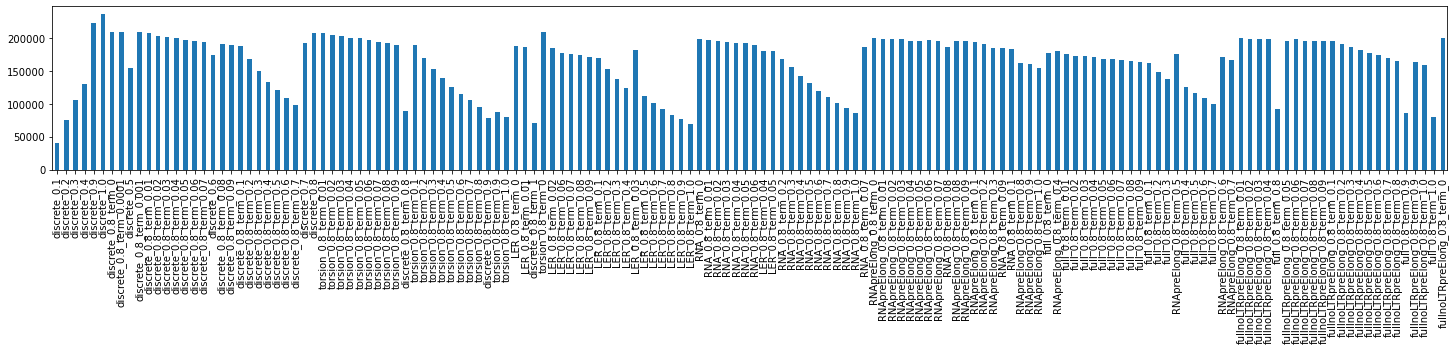

In [5]:
df00_output.T['xEnd'].plot.bar(figsize=(25,3))

In [6]:
modelType = df00_output.columns.to_series().str.split("_",expand=True)[0]
a = df00_output.T
a['modelType'] = modelType
df00_output = a.T
df00_output

discrete_0.1 discrete_0.2 discrete_0.3 discrete_0.4  \
time                  6000         6000         6000         6000   
c                        0            0            0            0   
dist                     0            0            0            0   
v5end                    0            0            0            0   
addProb                0.1          0.2          0.3          0.4   
vInt                    50           50           50           50   
preTermProb              0            0            0            0   
preTermDist              0            0            0            0   
nParticles         13.3907      24.8595      34.8194      43.3513   
xEnd               40673.4      75304.7       105323       130875   
xEndPremature            0            0            0            0   
tTaken             146.476      146.718      146.962      147.235   
processivity             1            1            1            1   
modelType         discrete     discrete     discrete     discrete   

              discrete_0.9 discrete_1.0 discrete_0.8_term_0  \
time                  6000         6000                6000   
c                        0            0                   0   
dist                     0            0                   0   
v5end                    0            0                   0   
addProb                0.9            1                 0.8   
vInt                    50           50                  50   
preTermProb              0            0                   0   
preTermDist              0            0                6750   
nParticles         77.2823      81.5669             70.8165   
xEnd                223073       236517              208786   
xEndPremature            0            0                   0   
tTaken             148.524      148.772             148.261   
processivity             1            1                   1   
modelType         discrete     discrete            discrete   

              discrete_0.8_term_0.0001 discrete_0.5 discrete_0.8_term_0.001  \
time                              6000         6000                    6000   
c                                    0            0                       0   
dist                                 0            0                       0   
v5end                                0            0                       0   
addProb                            0.8          0.5                     0.8   
vInt                                50           50                      50   
preTermProb                     0.0001            0                   0.001   
preTermDist                       6750            0                    6750   
nParticles                     70.8761      51.2898                 71.4927   
xEnd                            208927       154697                  209161   
xEndPremature                    18.75            0                 257.812   
tTaken                         148.262      147.488                 148.257   
processivity                   0.99991            1                0.998769   
modelType                     discrete     discrete                discrete   

               ... fullnoLTRpreElong_0.8_term_0.4  \
time           ...                           6000   
c              ...                            500   
dist           ...                              0   
v5end          ...                              0   
addProb        ...                            0.8   
vInt           ...                             50   
preTermProb    ...                            0.4   
preTermDist    ...                           2000   
nParticles     ...                        47.2499   
xEnd           ...                         182095   
xEndPremature  ...                        19003.1   
tTaken         ...                        114.047   
processivity   ...                       0.905503   
modelType      ...              fullnoLTRpreElong   

              fullnoLTRpreElong_0.8_term_0.5 fulln

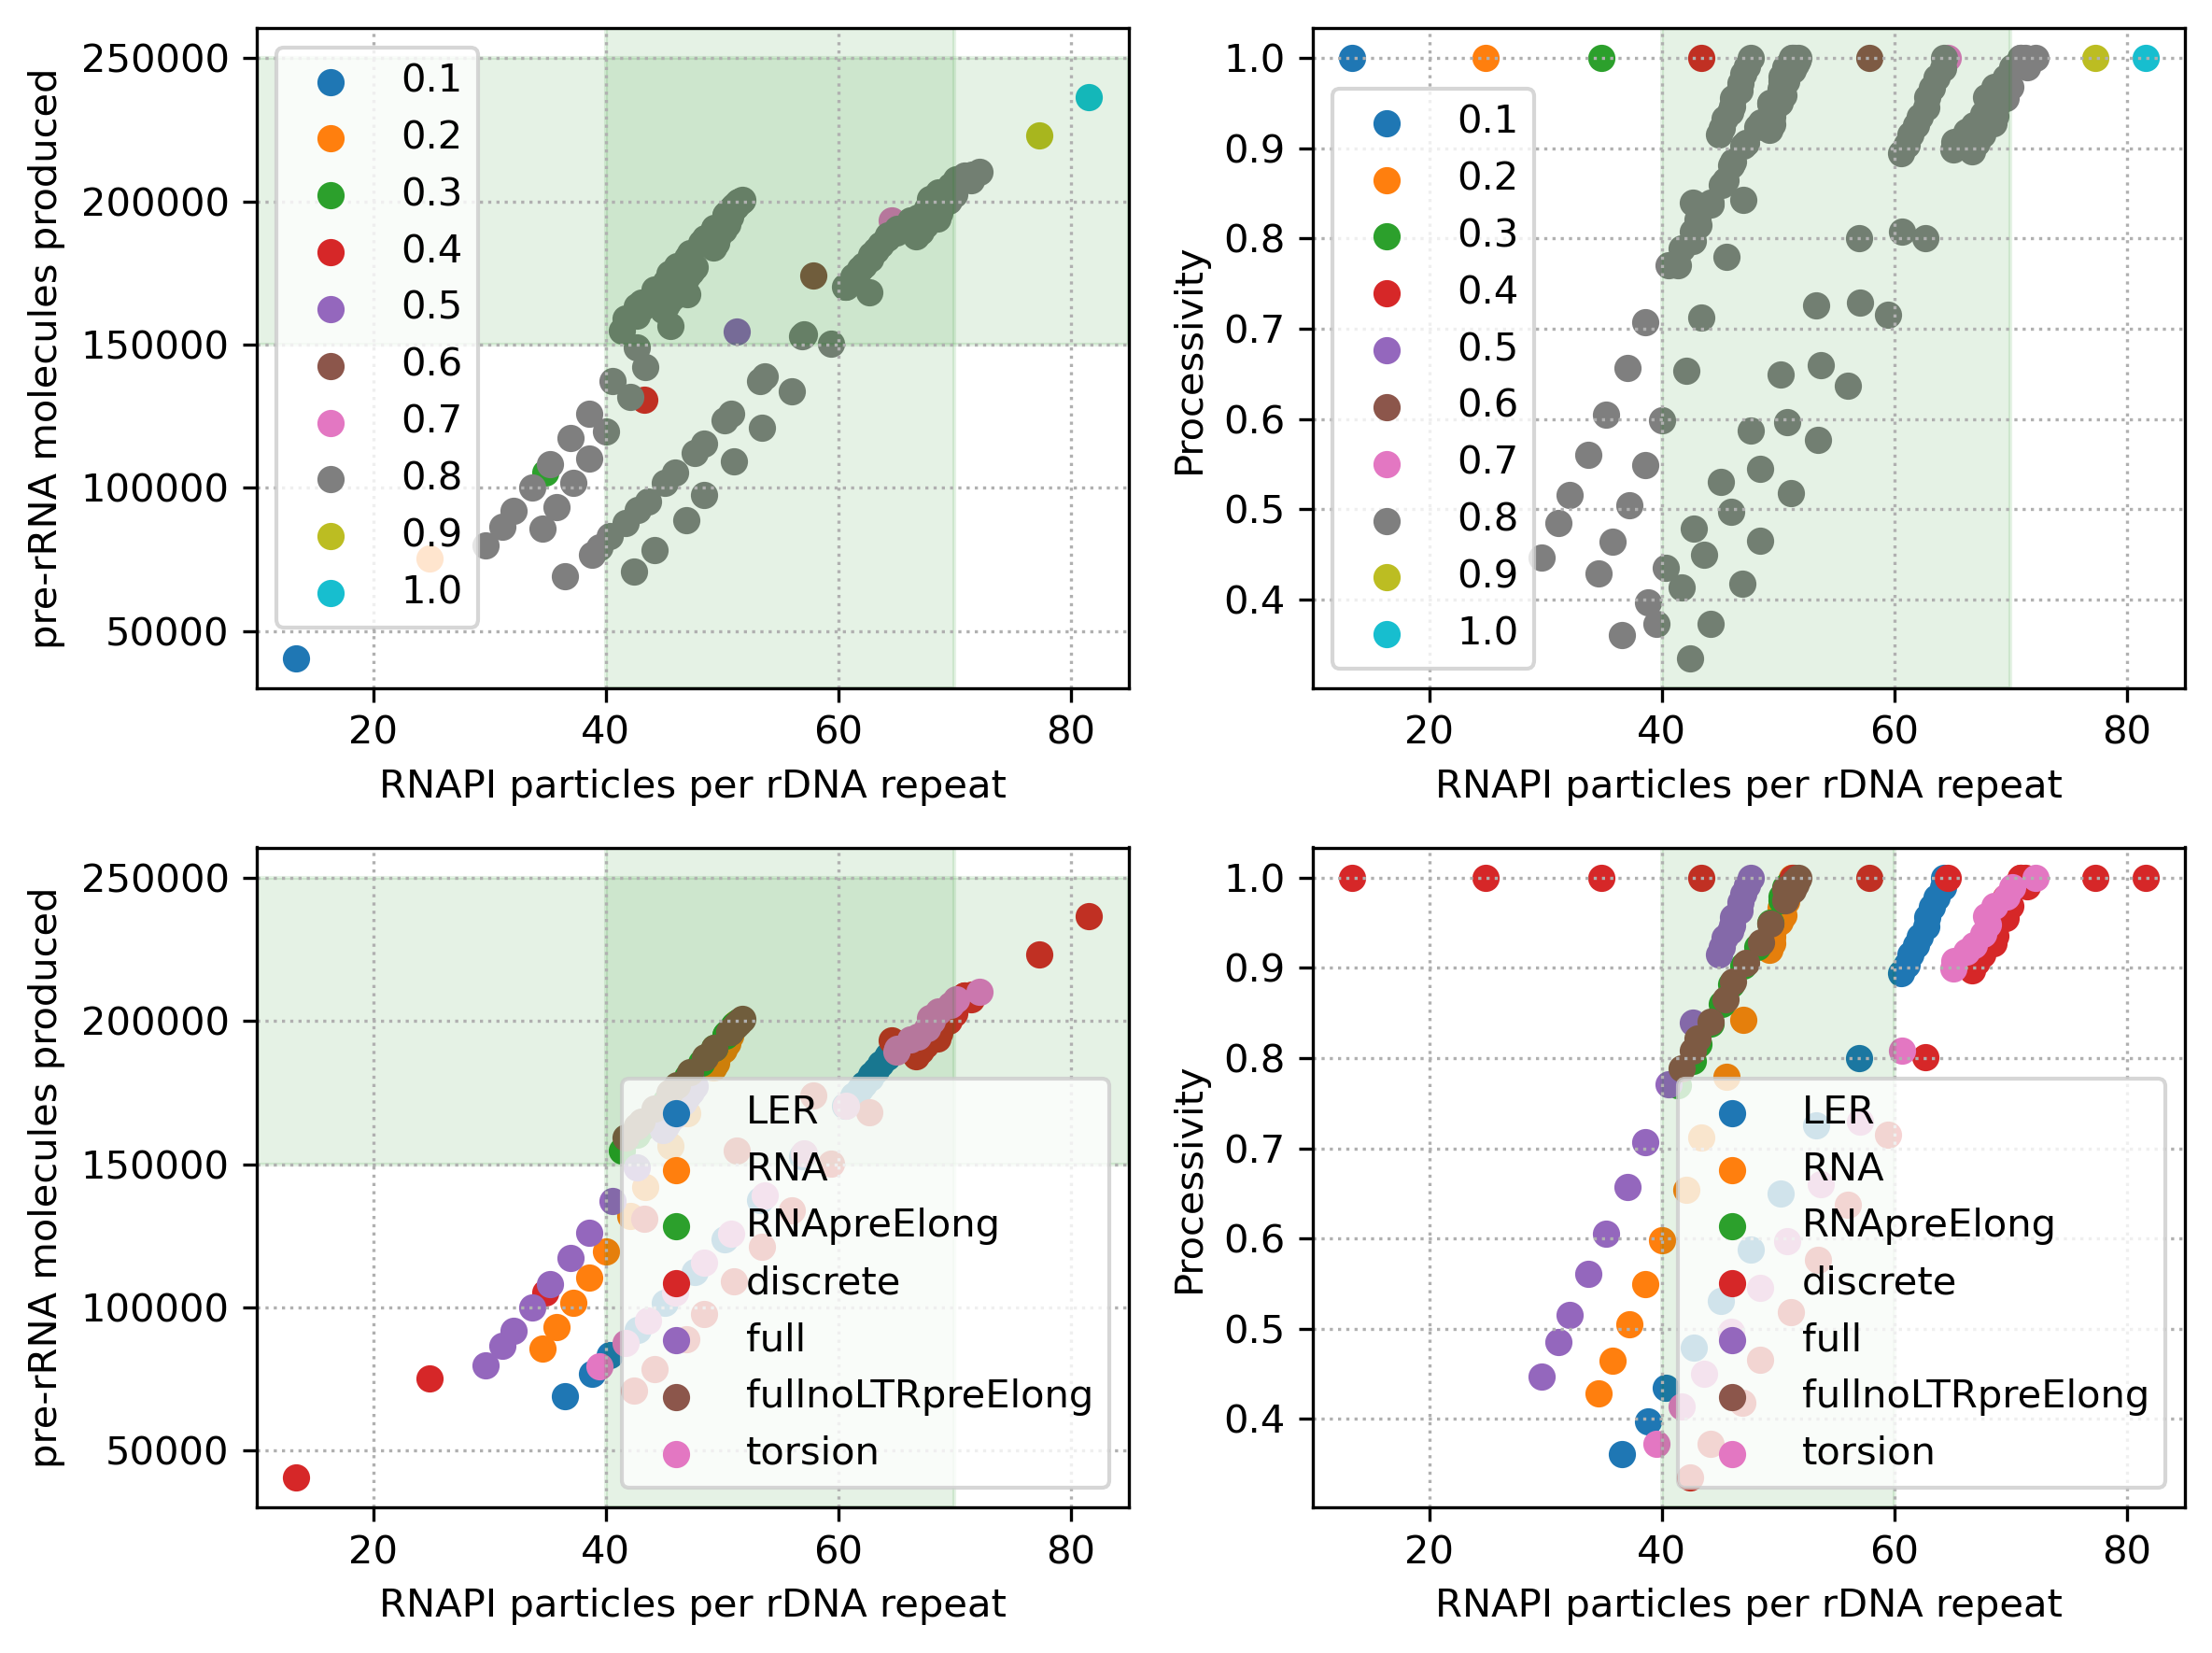

In [7]:
figsize=(8,6)
texts = []
data = df00_output.T
title = ''

fig = plt.figure(figsize=figsize, dpi=300)

#panel 1
ax1 = fig.add_subplot(2,2,1)
ax1.axvspan(40,70,color='green',alpha=0.1)
ax1.axhspan(150000,250000,color='green',alpha=0.1)

for group, df_temp in data.groupby('addProb'):
    a = df_temp['nParticles'].tolist()
    b = df_temp['xEnd'].tolist()
    ax1.scatter(x=a ,y=b ,label=group, cmap="paired")
#     for x, y, s in zip(a, b, df_temp.index.tolist()):
#         texts.append(plt.text(x, y, s))

ax1.legend()
ax1.grid(True,ls="dotted")
ax1.set_xlabel('RNAPI particles per rDNA repeat')
ax1.set_ylabel('pre-rRNA molecules produced')

#panel 2
ax2 = fig.add_subplot(2,2,2)
ax2.axvspan(40,60,color='green',alpha=0.1)
# ax1.axhspan(0,1,color='green',alpha=0.1)

for group, df_temp in data.groupby('addProb'):
    a = df_temp['nParticles'].tolist()
    b = df_temp['processivity'].tolist()
    ax2.scatter(x=a ,y=b ,label=group, cmap="paired")
#     for x, y, s in zip(a, b, df_temp.index.tolist()):
#         texts.append(plt.text(x, y, s))

ax2.legend()
ax2.grid(True,ls="dotted")
ax2.set_xlabel('RNAPI particles per rDNA repeat')
ax2.set_ylabel('Processivity')

#panel 3
ax1 = fig.add_subplot(2,2,3)
ax1.axvspan(40,60,color='green',alpha=0.1)
ax1.axhspan(150000,250000,color='green',alpha=0.1)

for group, df_temp in data.groupby('modelType'):
    a = df_temp['nParticles'].tolist()
    b = df_temp['xEnd'].tolist()
    ax1.scatter(x=a ,y=b ,label=group, cmap="paired")
#     for x, y, s in zip(a, b, df_temp.index.tolist()):
#         texts.append(plt.text(x, y, s))

ax1.legend()
ax1.grid(True,ls="dotted")
ax1.set_xlabel('RNAPI particles per rDNA repeat')
ax1.set_ylabel('pre-rRNA molecules produced')

#panel 4
ax2 = fig.add_subplot(2,2,4)
ax2.axvspan(40,60,color='green',alpha=0.1)
# ax1.axhspan(0,1,color='green',alpha=0.1)

for group, df_temp in data.groupby('modelType'):
    a = df_temp['nParticles'].tolist()
    b = df_temp['processivity'].tolist()
    ax2.scatter(x=a ,y=b ,label=group, cmap="paired")
#     for x, y, s in zip(a, b, df_temp.index.tolist()):
#         texts.append(plt.text(x, y, s))

ax2.legend()
ax2.grid(True,ls="dotted")
ax2.set_xlabel('RNAPI particles per rDNA repeat')
ax2.set_ylabel('Processivity')

plt.title(title)
plt.tight_layout()
# adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))
plt.show()

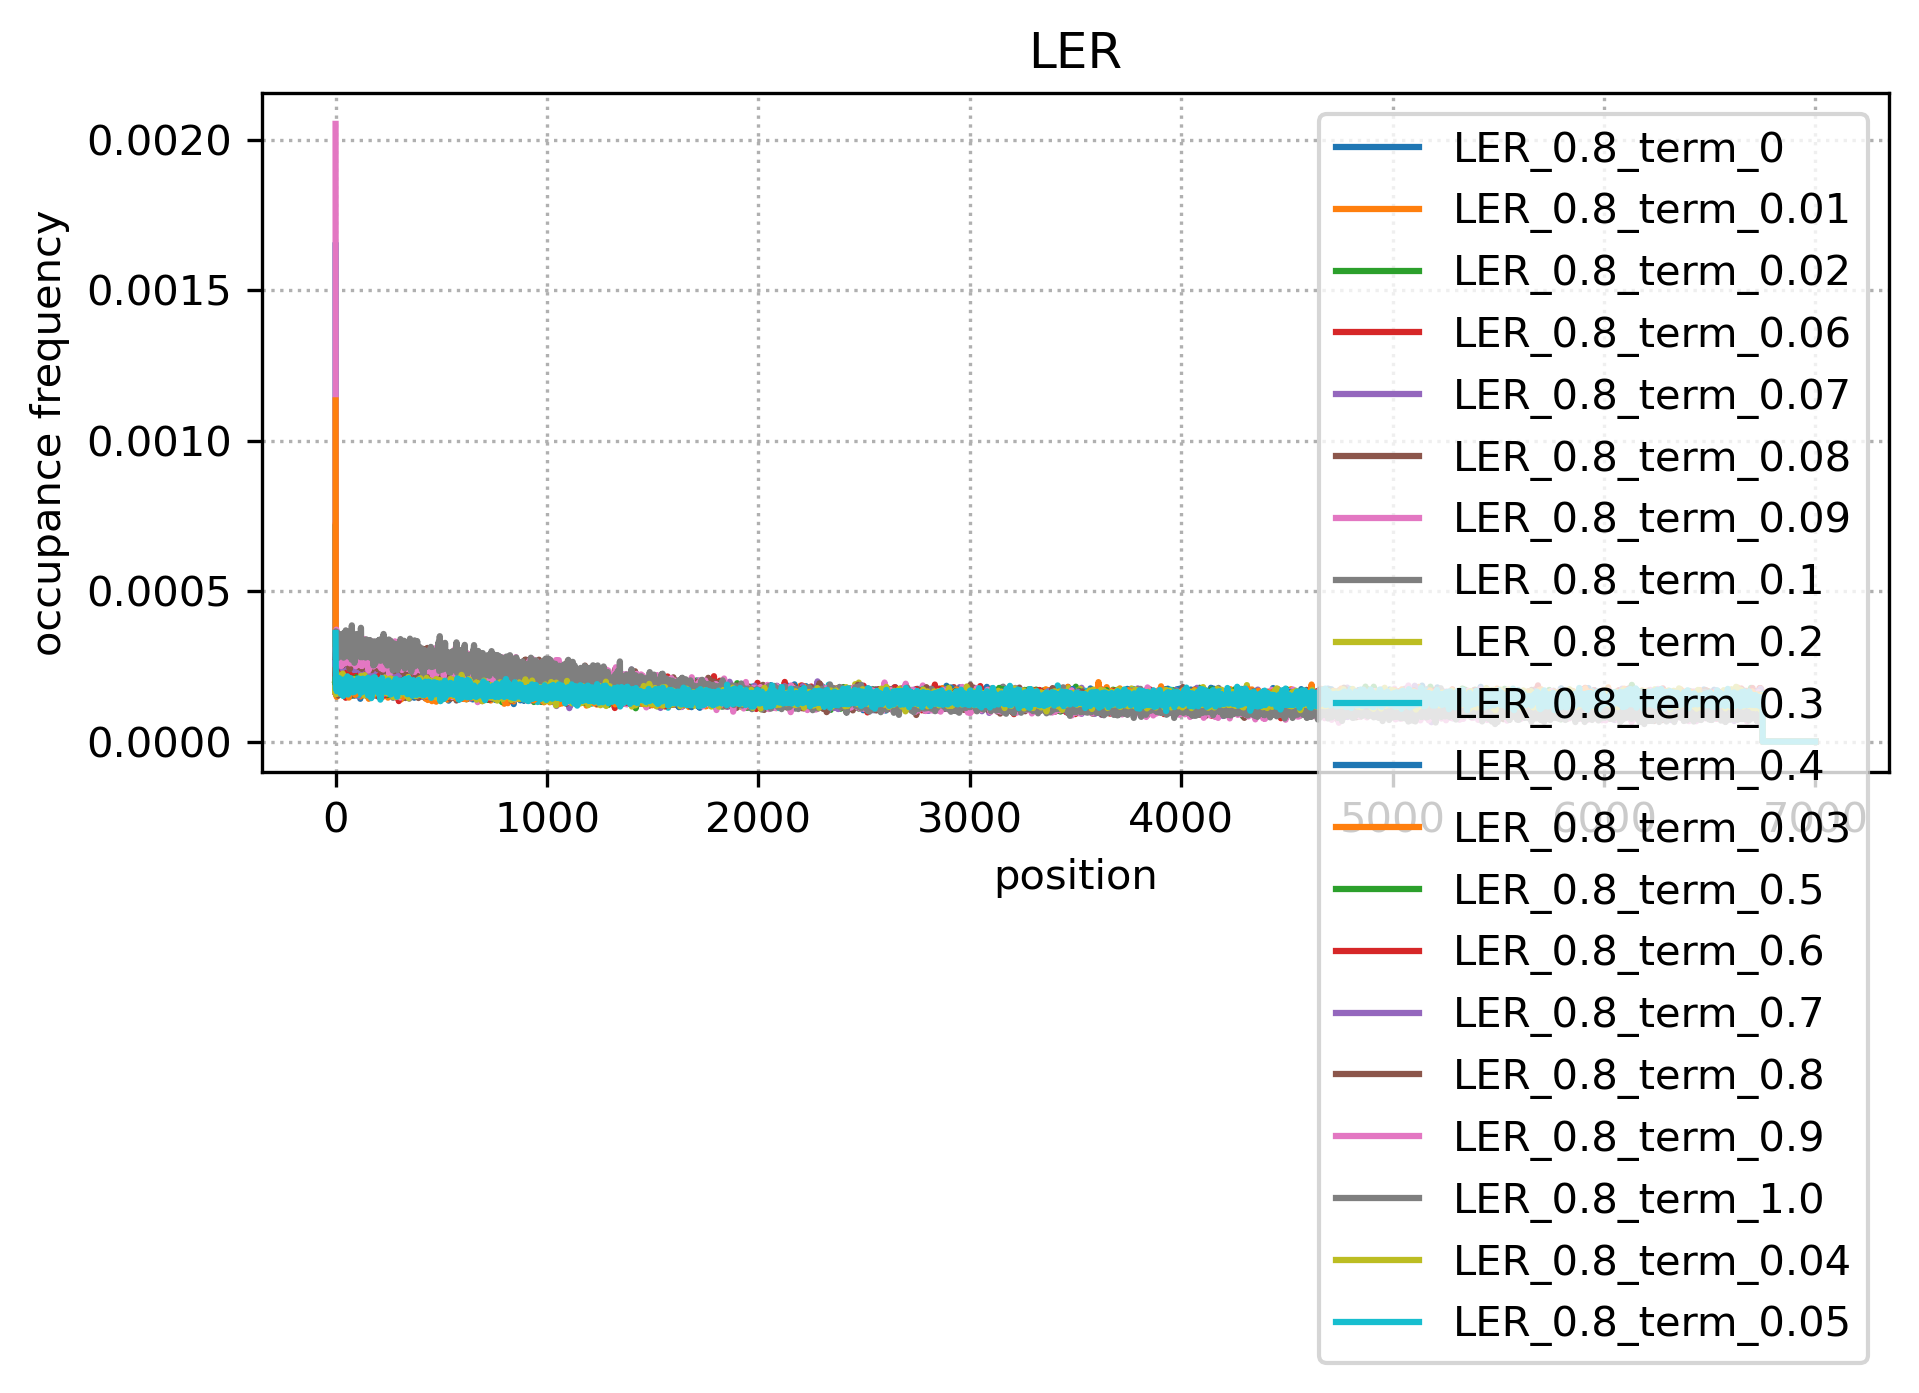

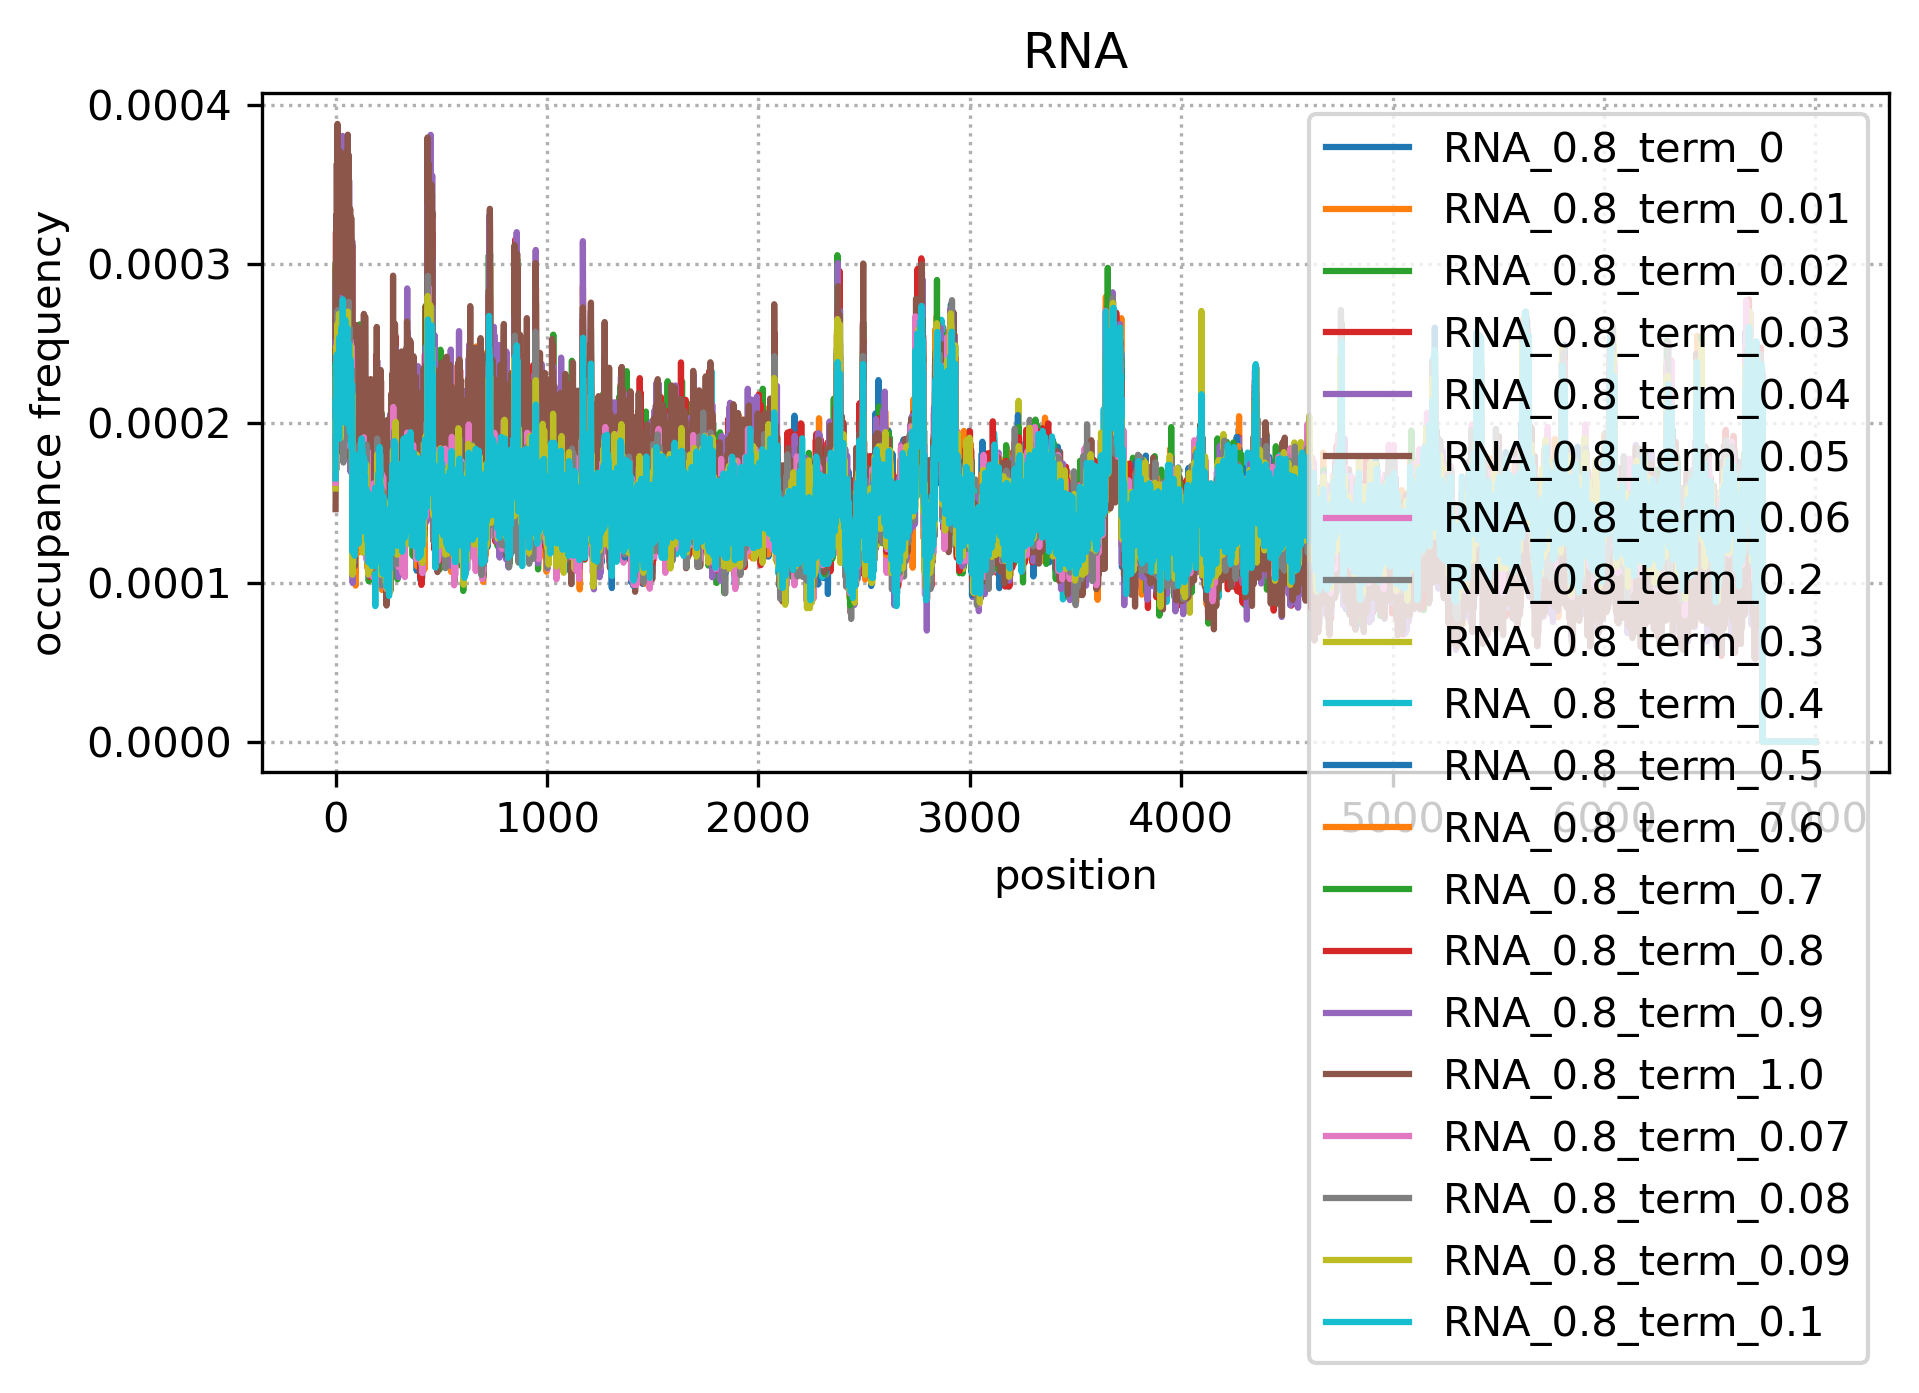

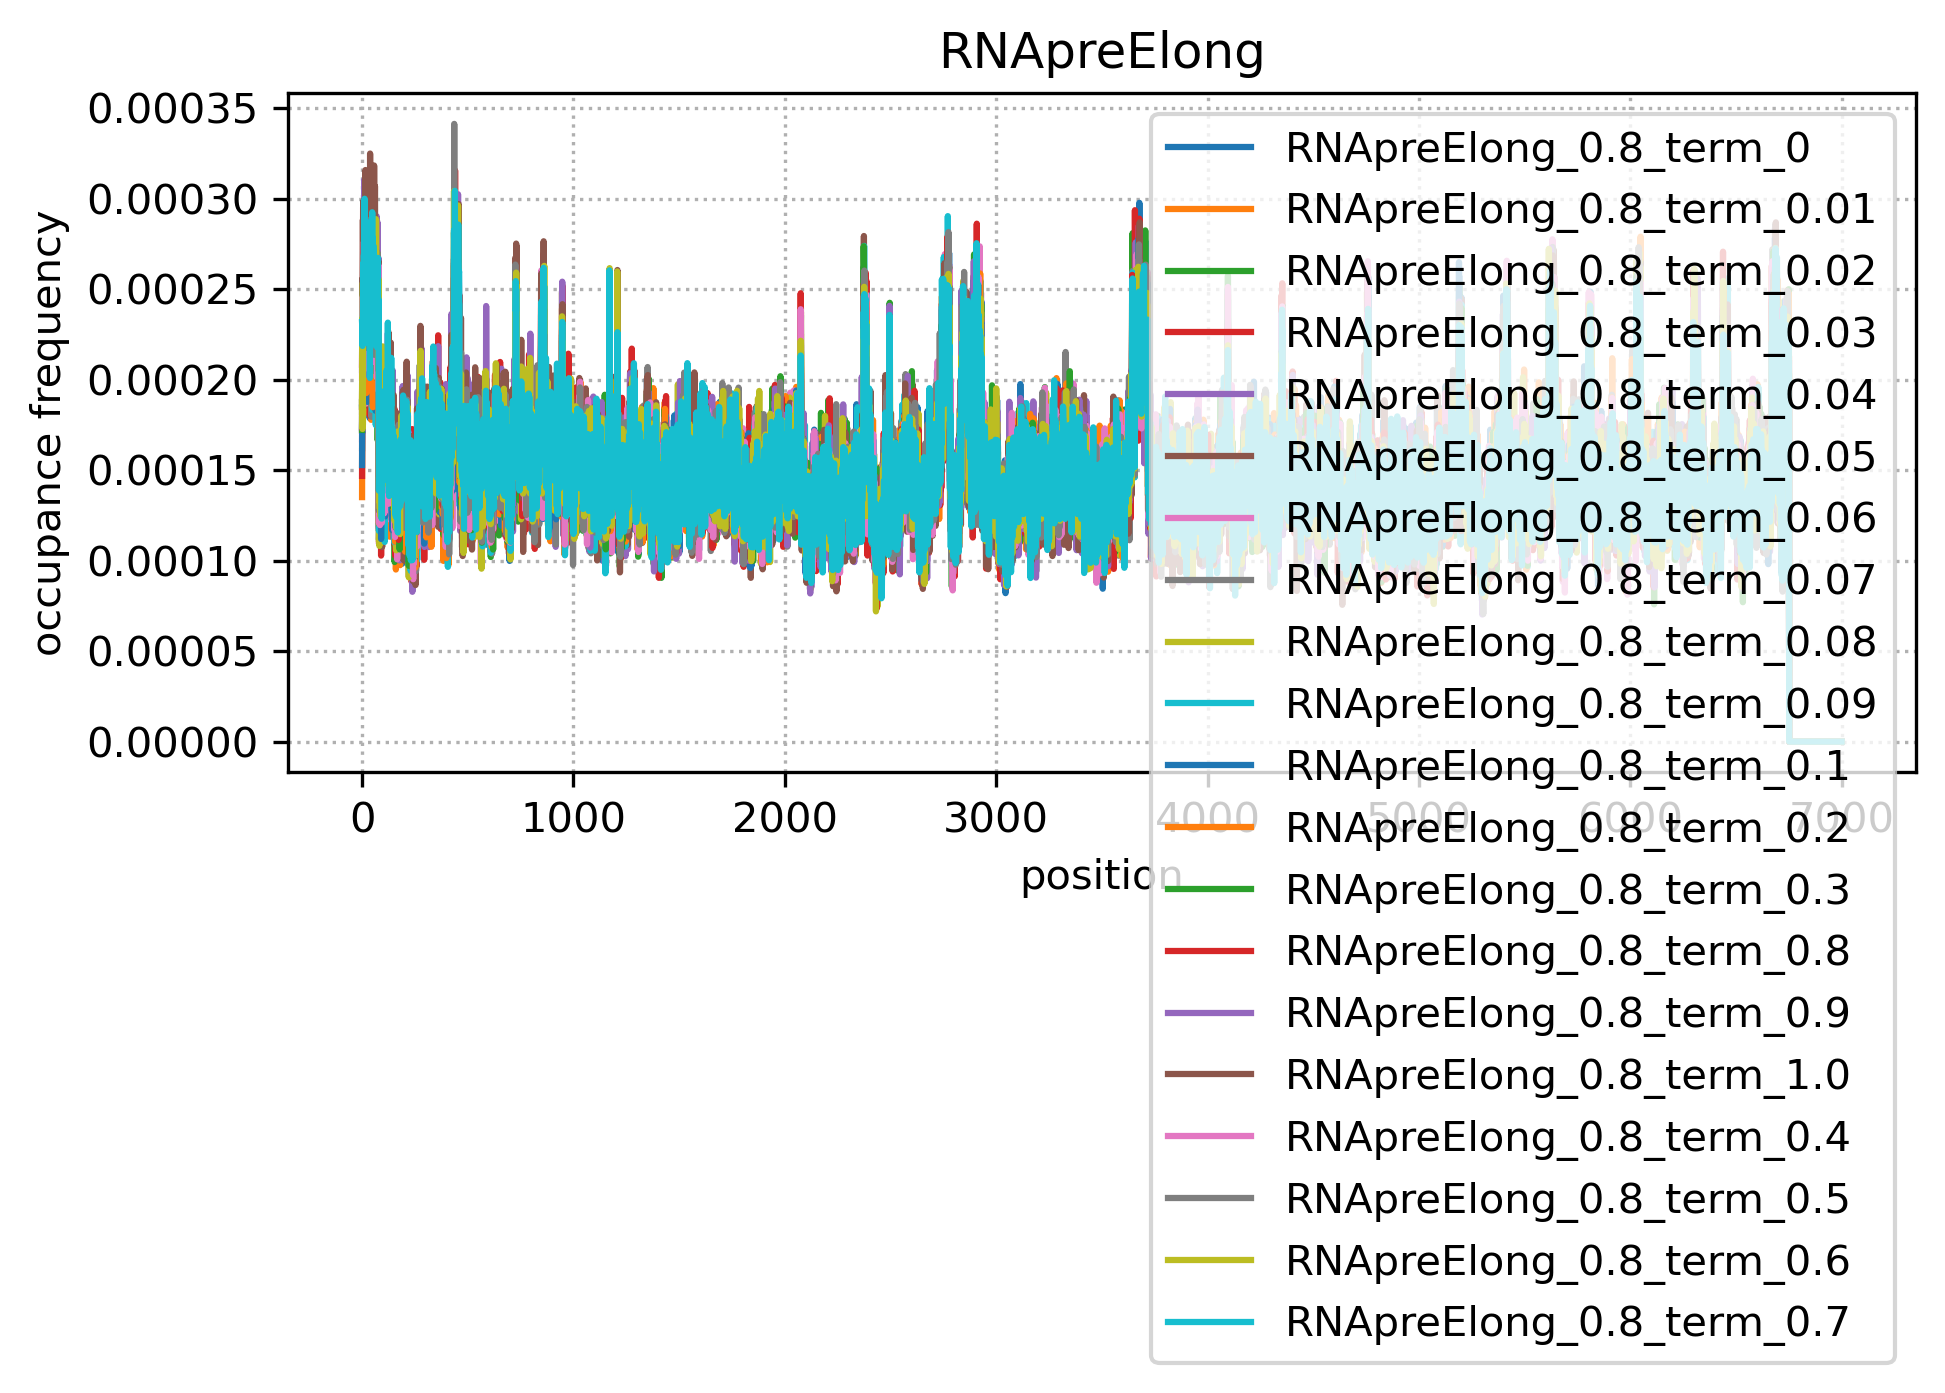

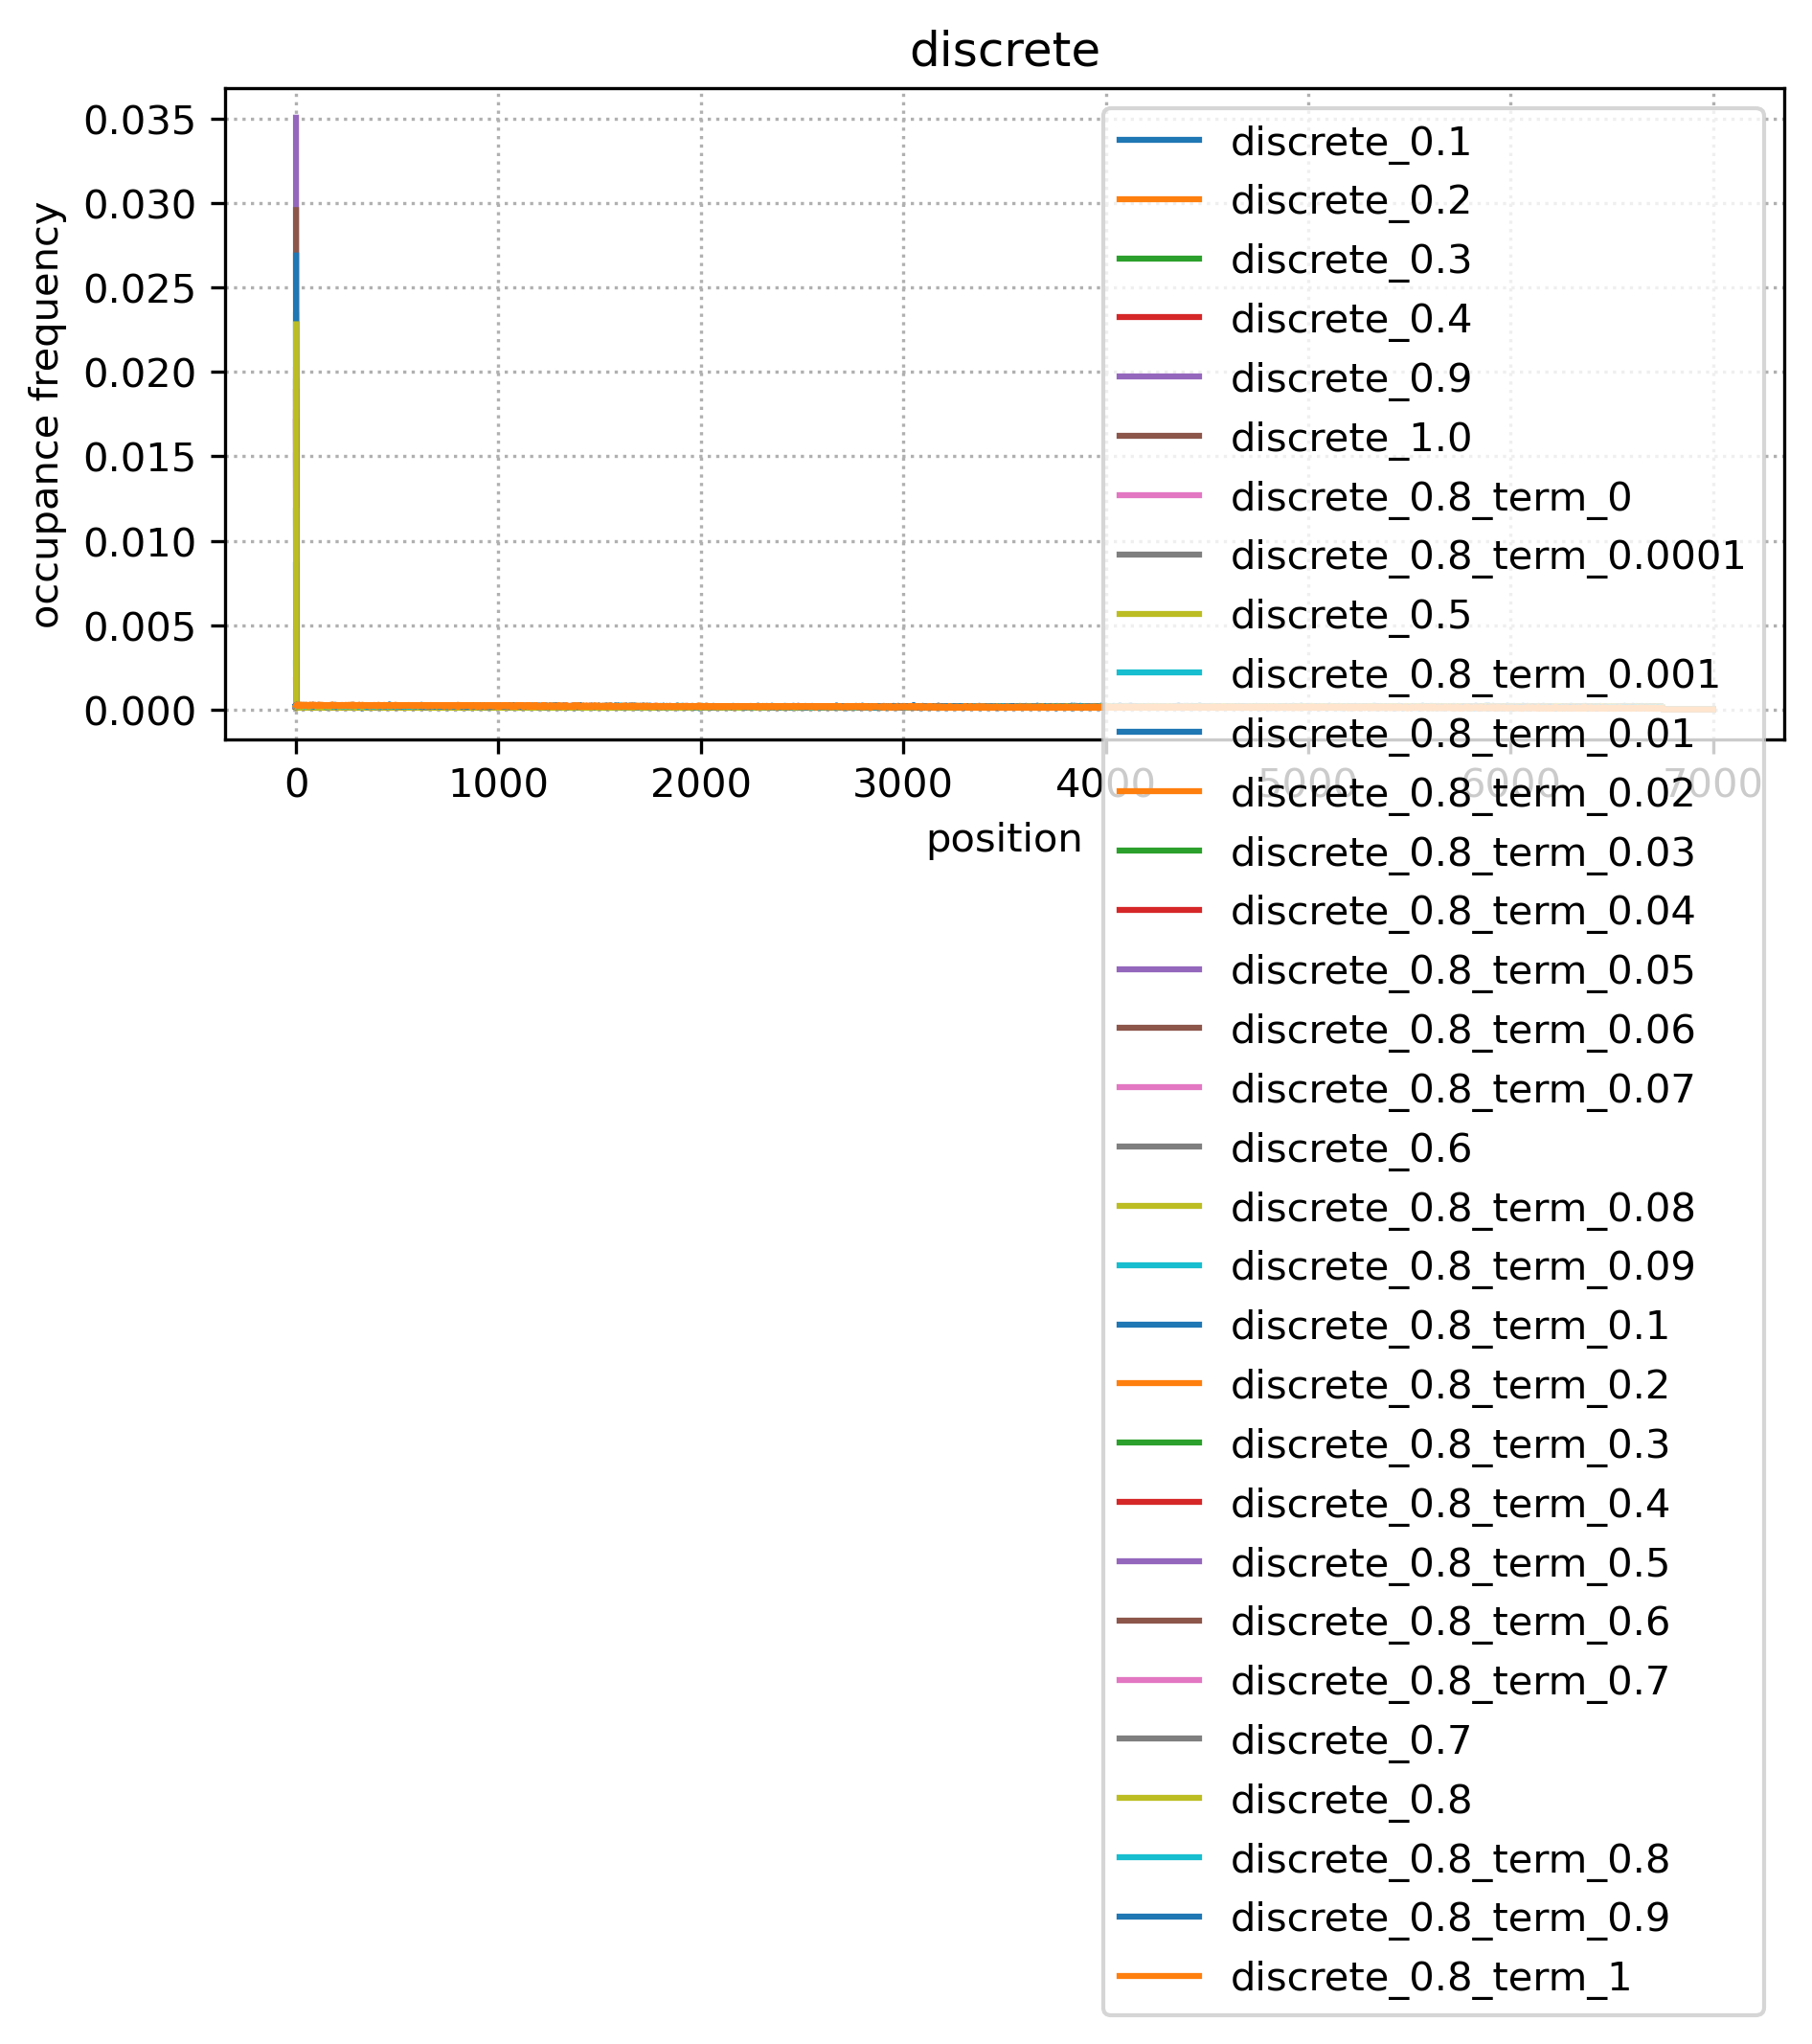

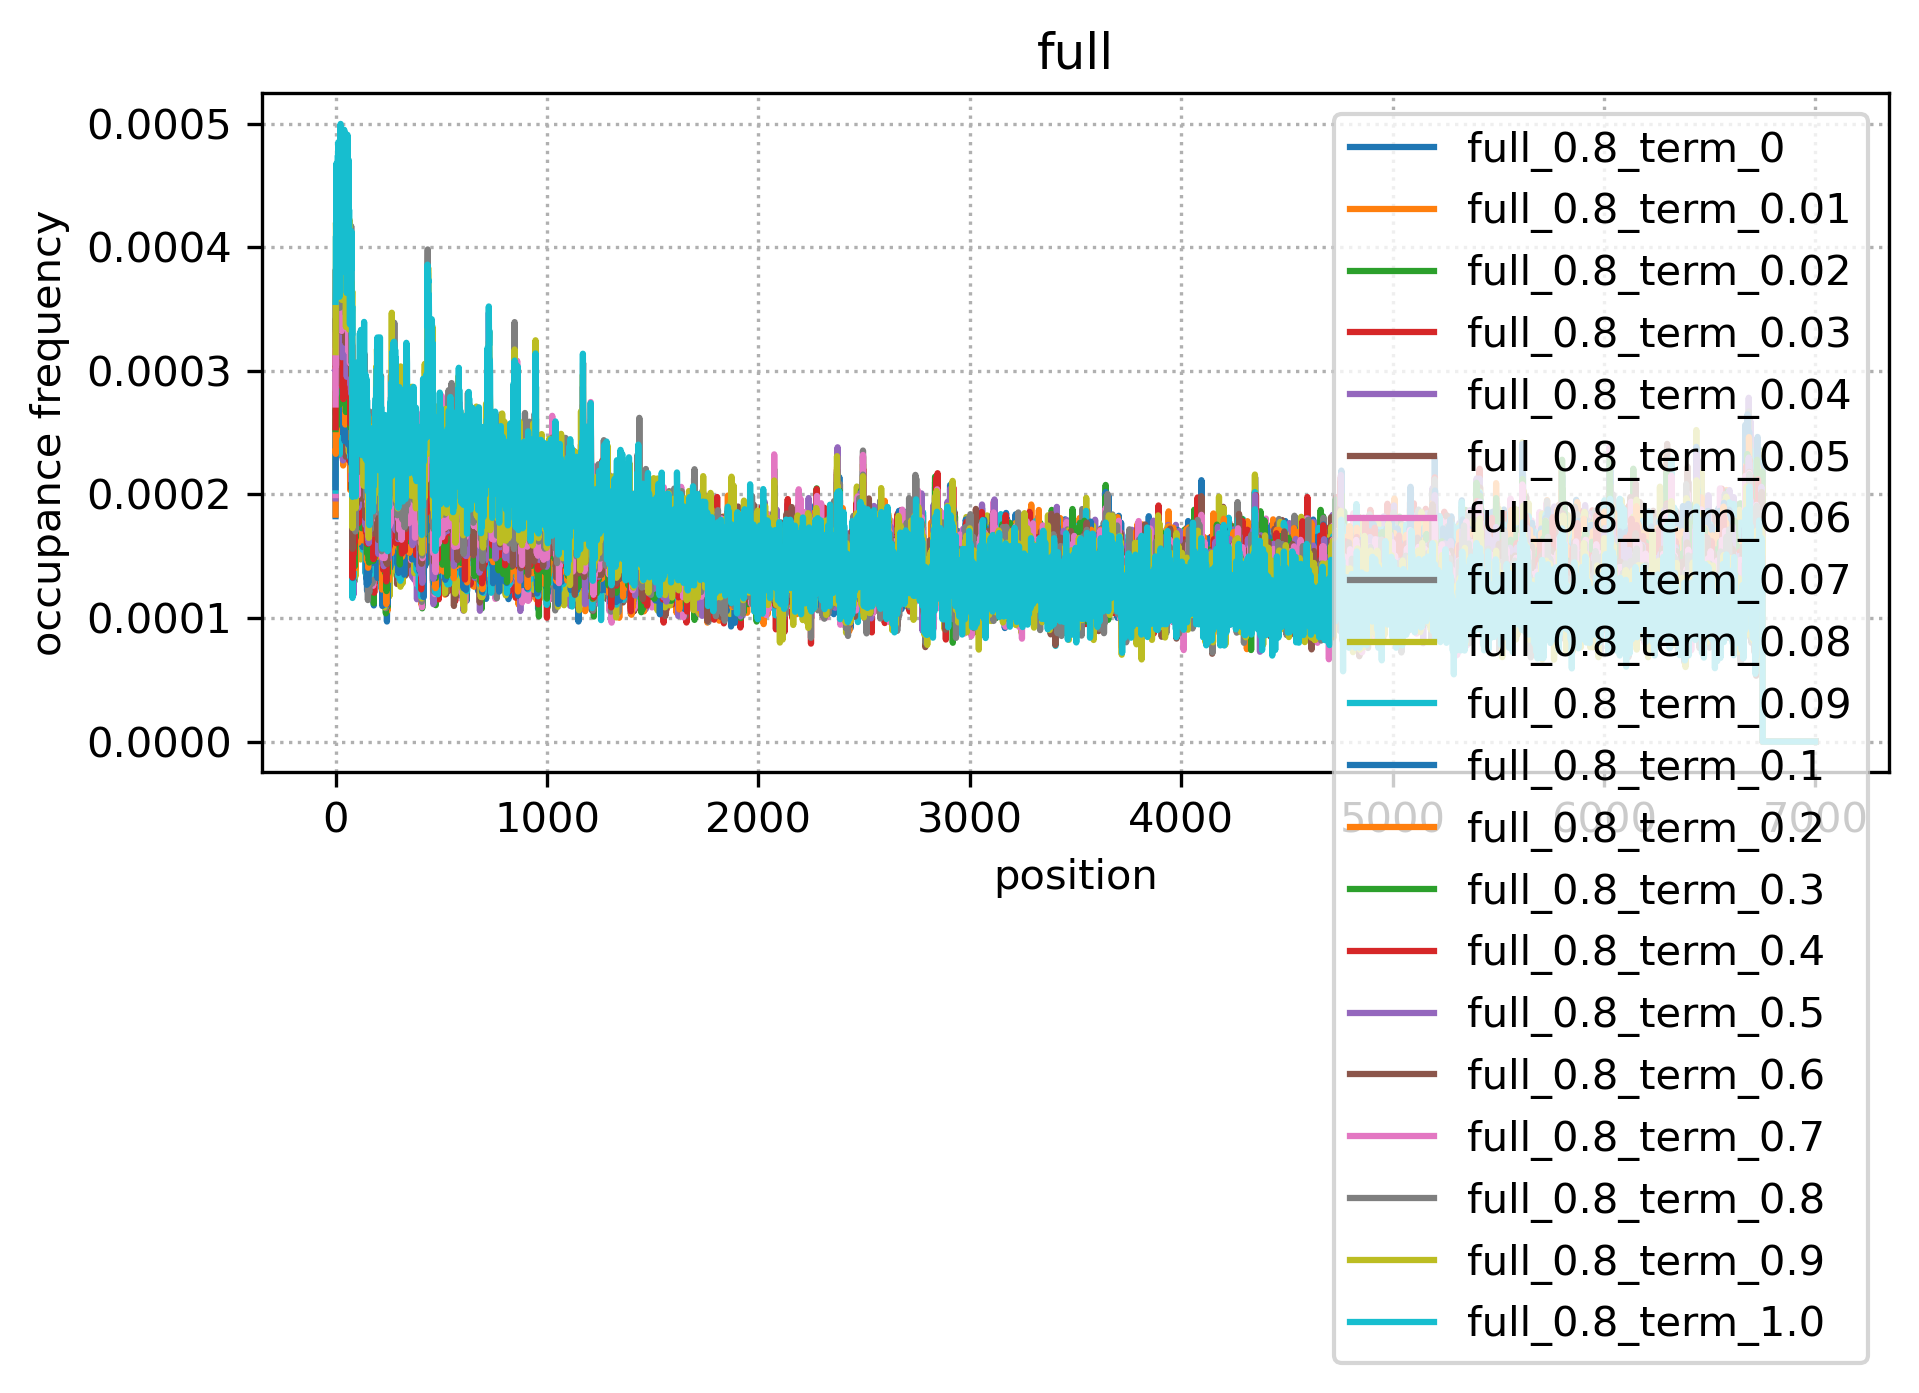

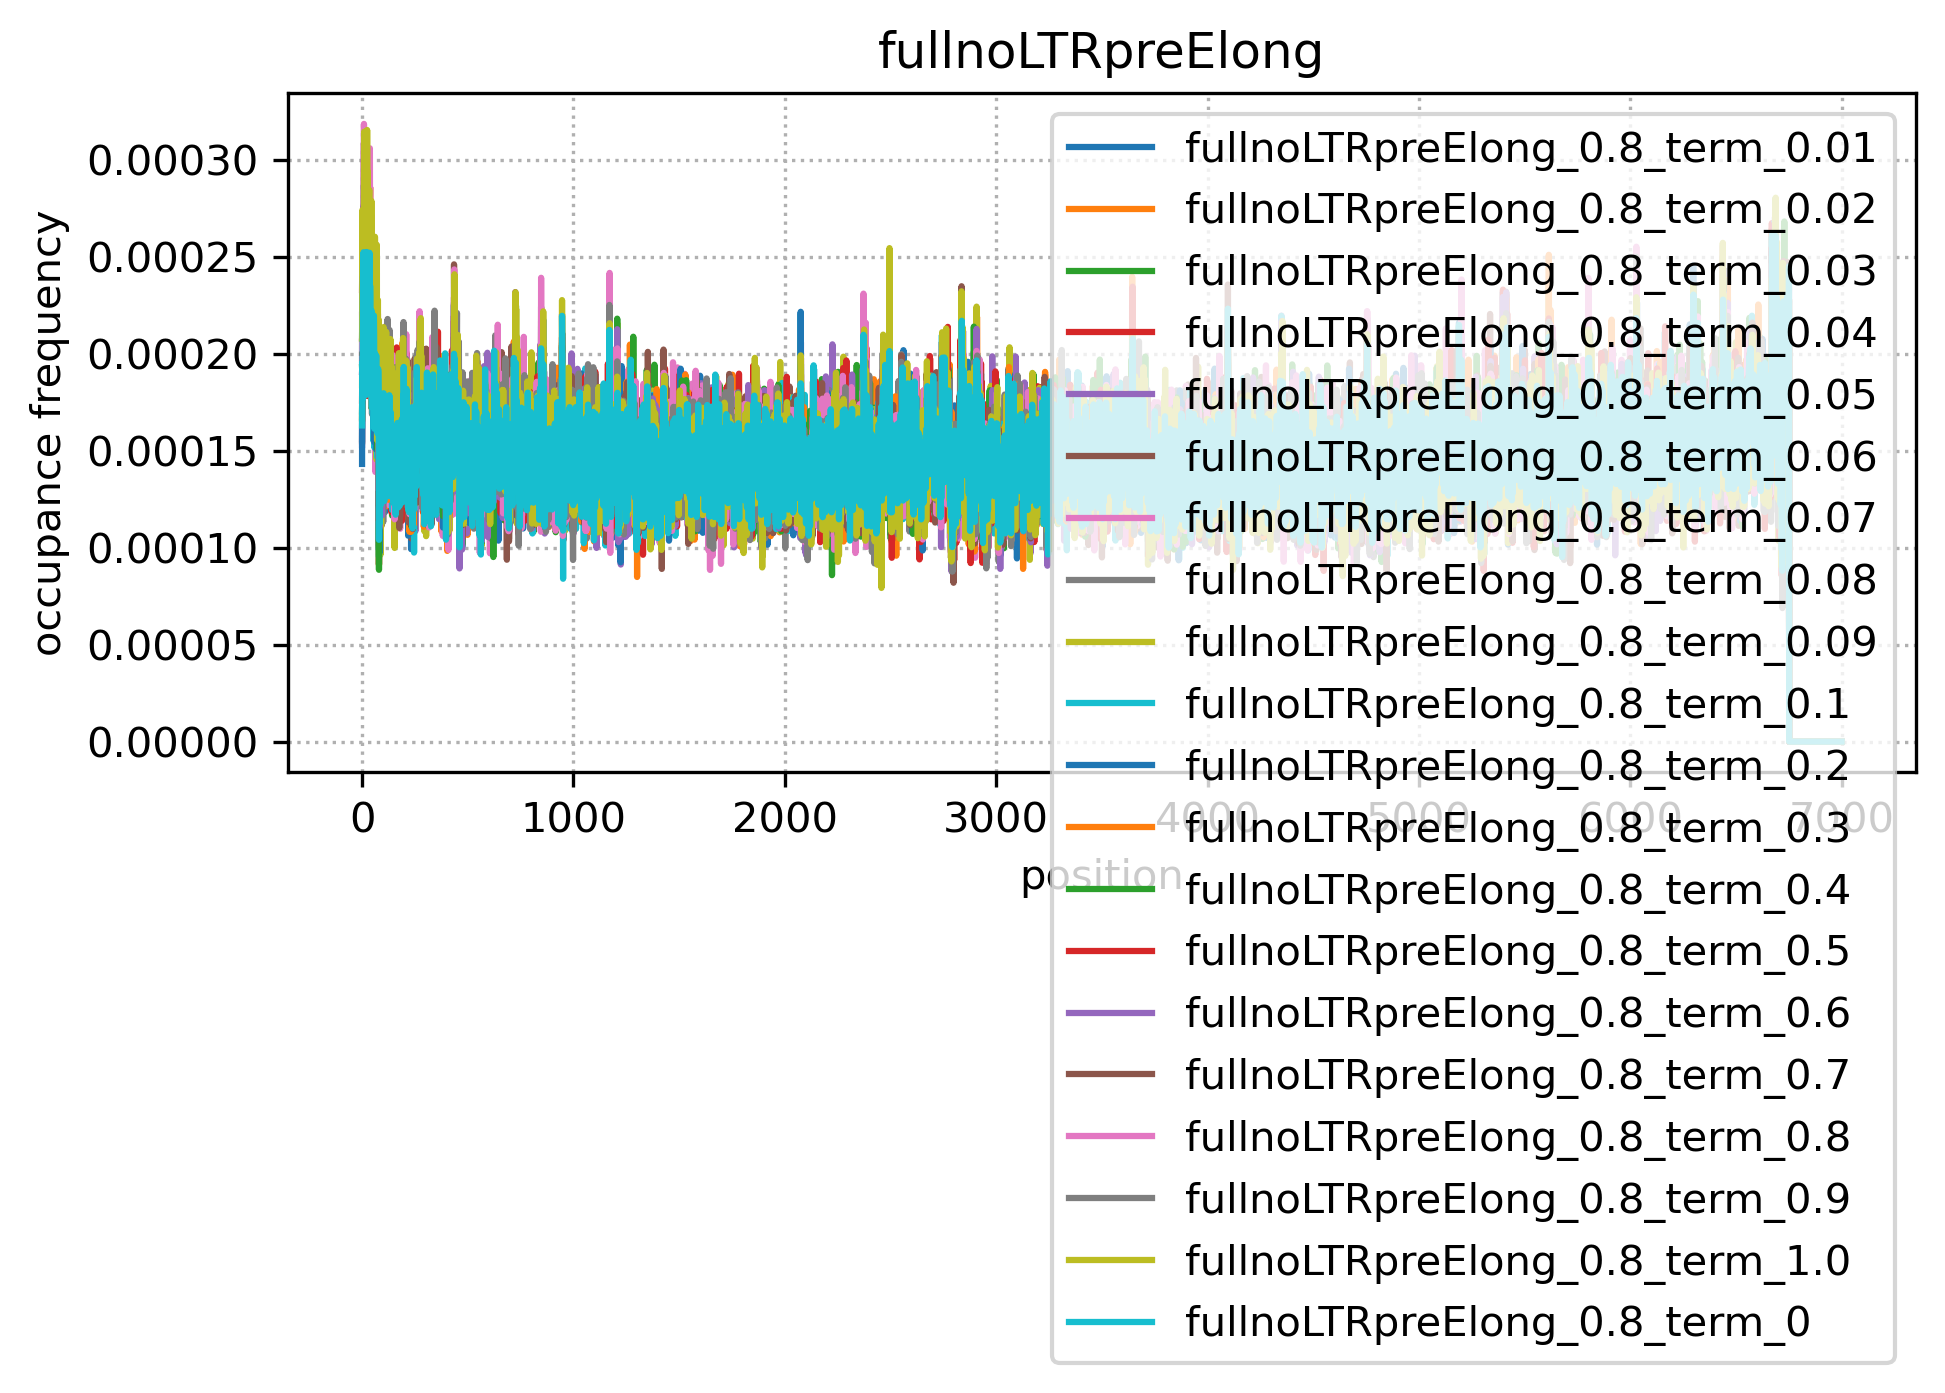

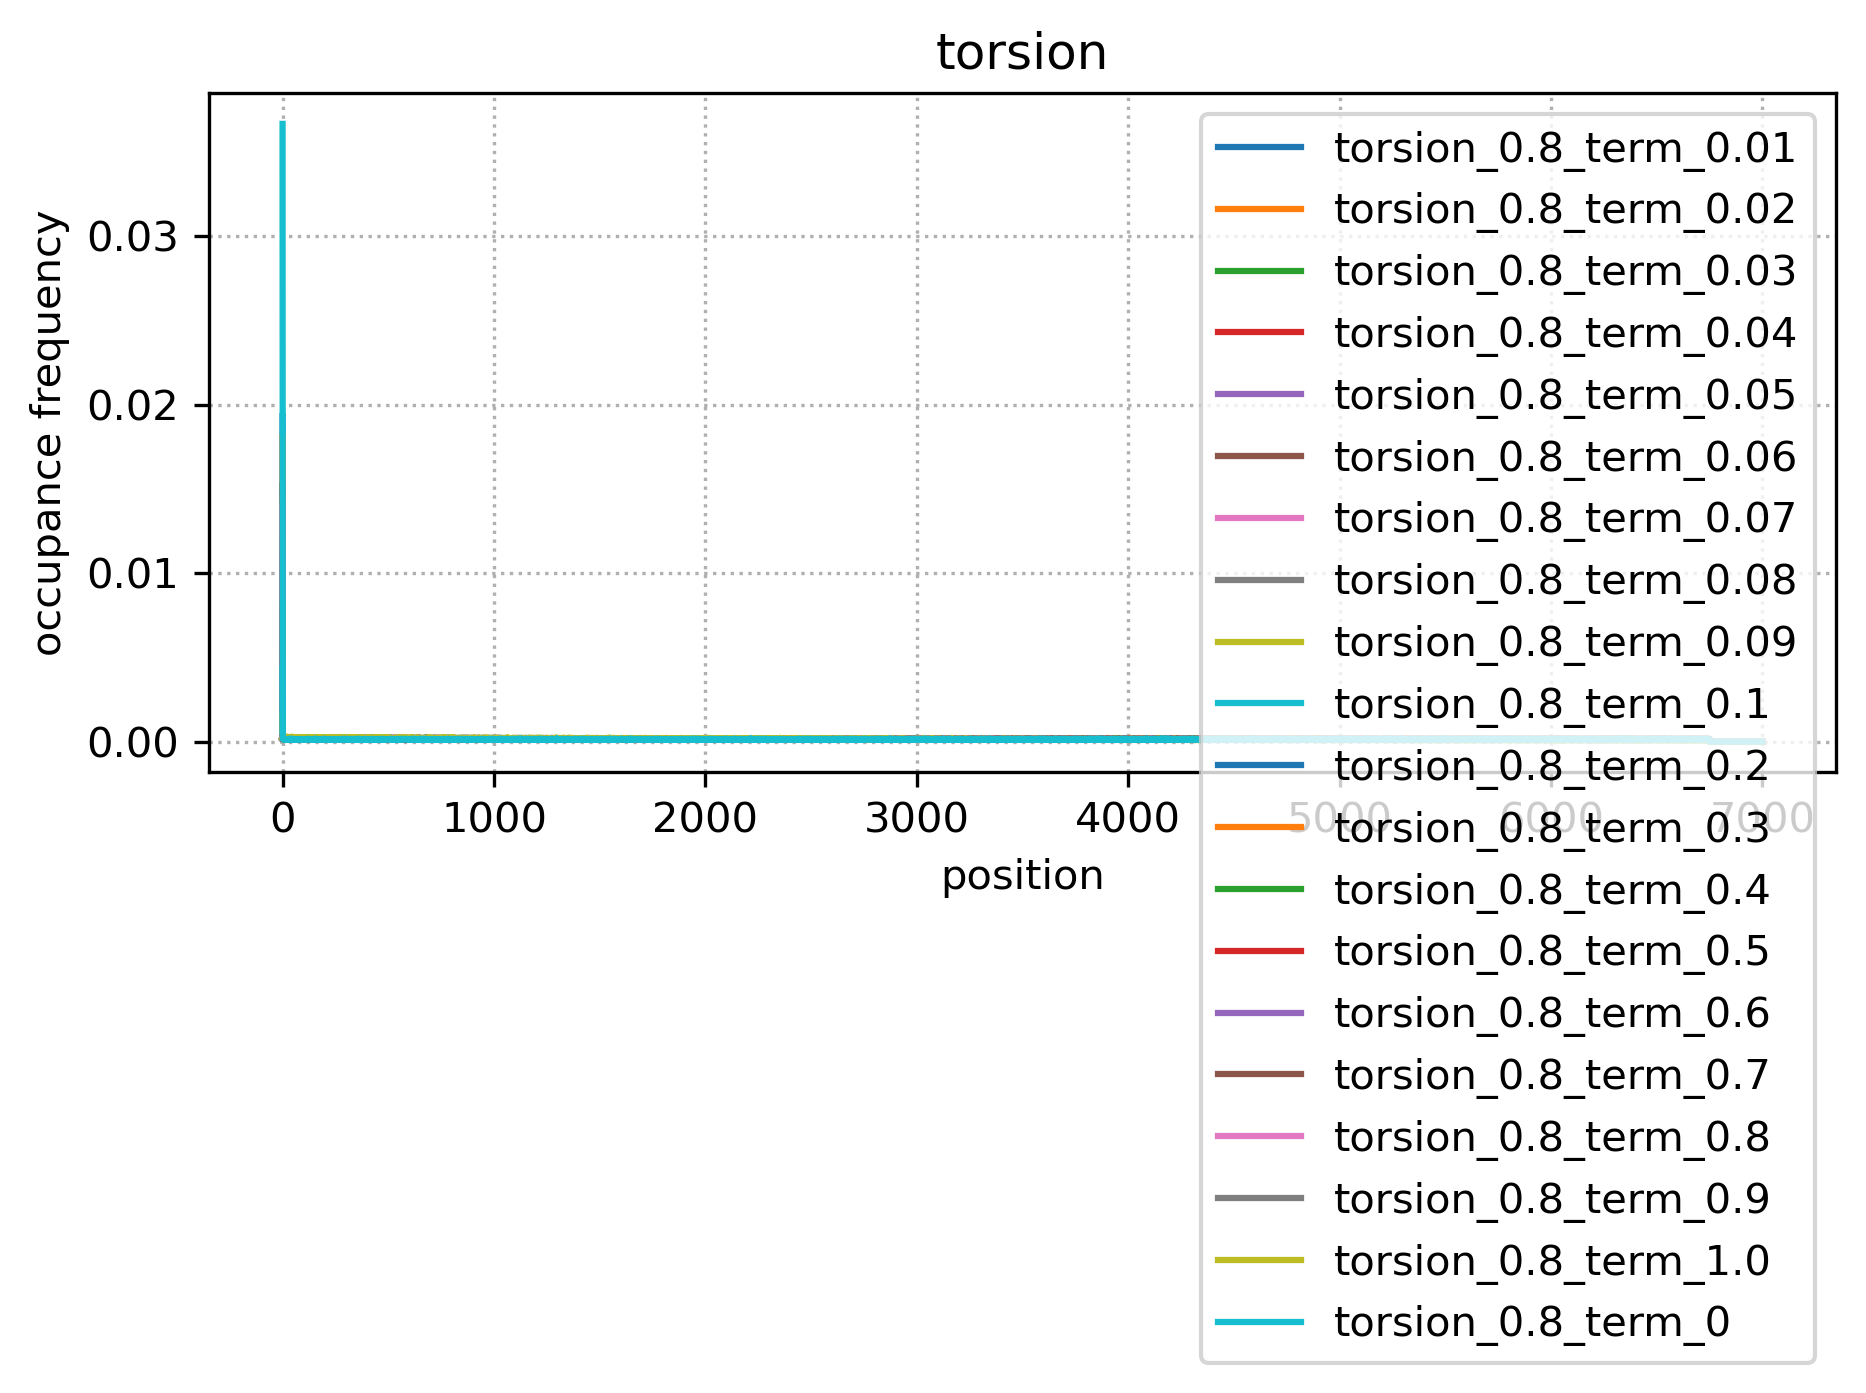

In [8]:
figsize=(7,3)
data = df00_output.T

for group, df_temp in data.groupby('modelType'):
    fig = plt.figure(figsize=figsize, dpi=300)
    ax1 = fig.add_subplot()
    a = df01_plots.index.tolist()
    
    for i in df_temp.index:       
        b = df01_plots[i].tolist()
        ax1.plot(a ,b ,label=i)

    ax1.legend()
    ax1.grid(True,ls="dotted")
    ax1.set_xlabel('position')
    ax1.set_ylabel('occupance frequency')
    plt.title(group)
    plt.show()

In [9]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

for group, df_temp in data.groupby('modelType'):
    a = df_temp['nParticles'].tolist()
    b = df_temp['xEnd'].tolist()
    names = df_temp.index.tolist()

    fig.add_trace(
        go.Scatter(x=a, y=b,text=names))

fig.update_traces(
    hoverinfo="name+x+text",
    line={"width": 0.5},
    marker={"size": 8},
    mode="markers",
    showlegend=False
)

fig.update_layout(template="plotly_white")

fig.show()

In [10]:
import plotly.express as px
fig = px.scatter(data, x="nParticles", y="xEnd", color="modelType", symbol="modelType")
fig.update_layout(template="plotly_white")
fig.add_shape( # add a horizontal "target" line
    type="line", line_color="salmon", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, y0=200000, y1=200000, yref="y"
)
# fig.add_shape( # add a horizontal "target" line
#     type="line", line_color="green", line_width=3, opacity=1, line_dash="dot",
#     x0=50, x1=50, y0=0, y1=1
# )
# fig.add_shape(type="line",x0=1, y0=0, x1=1, y1=2,
#     line=dict(color="RoyalBlue",width=3)
# )
# fig.add_shape(type="line",
#     x0=2, y0=2, x1=5, y1=2,
#     line=dict(
#         color="LightSeaGreen",
#         width=4,
#         dash="dashdot"))
fig.show()

In [11]:
fig = px.scatter(data, x="tTaken", y="xEnd", color="modelType", symbol="modelType")
fig.update_layout(template="plotly_white")
fig.add_shape( # add a horizontal "target" line
    type="line", line_color="salmon", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, y0=200000, y1=200000, yref="y"
)
# fig.add_shape( # add a horizontal "target" line
#     type="line", line_color="green", line_width=3, opacity=1, line_dash="dot",
#     x0=50, x1=50, y0=0, y1=1
# )
# fig.add_shape(type="line",x0=1, y0=0, x1=1, y1=2,
#     line=dict(color="RoyalBlue",width=3)
# )
# fig.add_shape(type="line",
#     x0=2, y0=2, x1=5, y1=2,
#     line=dict(
#         color="LightSeaGreen",
#         width=4,
#         dash="dashdot"))
fig.show()

# Figures

In [12]:
d = data[(data['modelType']=='discrete') & (data['preTermDist']!=0)].sort_values('preTermProb',ascending=False)
d

time  c dist v5end addProb vInt preTermProb  \
discrete_0.8_term_1       6000  0    0     0     0.8   50           1   
discrete_0.8_term_0.9     6000  0    0     0     0.8   50         0.9   
discrete_0.8_term_0.8     6000  0    0     0     0.8   50         0.8   
discrete_0.8_term_0.7     6000  0    0     0     0.8   50         0.7   
discrete_0.8_term_0.6     6000  0    0     0     0.8   50         0.6   
discrete_0.8_term_0.5     6000  0    0     0     0.8   50         0.5   
discrete_0.8_term_0.4     6000  0    0     0     0.8   50         0.4   
discrete_0.8_term_0.3     6000  0    0     0     0.8   50         0.3   
discrete_0.8_term_0.2     6000  0    0     0     0.8   50         0.2   
discrete_0.8_term_0.1     6000  0    0     0     0.8   50         0.1   
discrete_0.8_term_0.09    6000  0    0     0     0.8   50        0.09   
discrete_0.8_term_0.08    6000  0    0     0     0.8   50        0.08   
discrete_0.8_term_0.07    6000  0    0     0     0.8   50        0.07   
discrete_0.8_term_0.06    6000  0    0     0     0.8   50        0.06   
discrete_0.8_term_0.05    6000  0    0     0     0.8   50        0.05   
discrete_0.8_term_0.04    6000  0    0     0     0.8   50        0.04   
discrete_0.8_term_0.03    6000  0    0     0     0.8   50        0.03   
discrete_0.8_term_0.02    6000  0    0     0     0.8   50        0.02   
discrete_0.8_term_0.01    6000  0    0     0     0.8   50        0.01   
discrete_0.8_term_0.001   6000  0    0     0     0.8   50       0.001   
discrete_0.8_term_0.0001  6000  0    0     0     0.8   50      0.0001   
discrete_0.8_term_0       6000  0    0     0     0.8   50           0   

                         preTermDist nParticles     xEnd xEndPremature  \
discrete_0.8_term_1             6750    42.4099  70982.8        140766   
discrete_0.8_term_0.9           6750    44.1621  78482.8        132131   
discrete_0.8_term_0.8           6750    46.8937  88856.2        123731   
discrete_0.8_term_0.7           6750    48.4617  97621.9        112116   
discrete_0.8_term_0.6           6750    51.0578   109209        101606   
discrete_0.8_term_0.5           6750    53.4502   121069       88978.1   
discrete_0.8_term_0.4           6750    55.9776   133777       76209.4   
discrete_0.8_term_0.3           6750    59.4104   150192         59775   
discrete_0.8_term_0.2           6750    62.6582   168145       41915.6   
discrete_0.8_term_0.1           6750    66.6799   187777       21590.6   
discrete_0.8_term_0.09          6750    67.1077   189506       19640.6   
discrete_0.8_term_0.08          6750    67.5179   191677       17817.2   
discrete_0.8_term_0.07          6750    68.5108   193917       15201.6   
discrete_0.8_term_0.06          6750    68.6987   195867       13429.7   
discrete_0.8_term_0.05          6750    68.7836   197864       10954.7   
discrete_0.8_term_0.04          6750    69.5261   200091       9370.31   
discrete_0.8_term_0.03          6750    69.9606   202594       6581.25   
discrete_0.8_term_0.02          6750    69.5946   203648       4542.19   
discrete_0.8_term_0.01          6750    71.4439   207473       2132.81   
discrete_0.8_term_0.001         6750    71.4927   209161       257.812   
discrete_0.8_term_0.0001        6750    70.8761   208927         18.75   
discrete_0.8_term_0             6750    70.8165   208786             0   

                           tTaken processivity modelType  
discrete_0.8_term_1       147.275     0.335222  discrete  
discrete_0.8_term_0.9     147.321     0.372638  discrete  
discrete_0.8_term_0.8     147.398     0.417975  discrete  
discrete_0.8_term_0.7     147.442     0.465448  discrete  
discrete_0.8_term_0.6     147.534     0.518033  discrete  
discrete_0.8_term_0.5     147.621     0.576389  discrete  
discrete_0.8_term_0.4     147.697     0.637074  discrete  
discrete_0.8_term_0.3     147.831     0.715313  discrete  
discrete_0.8_term_0.2     147.942      0.80046  discrete  
discrete_0.8_term_0.1     148.096     0.896877  discr

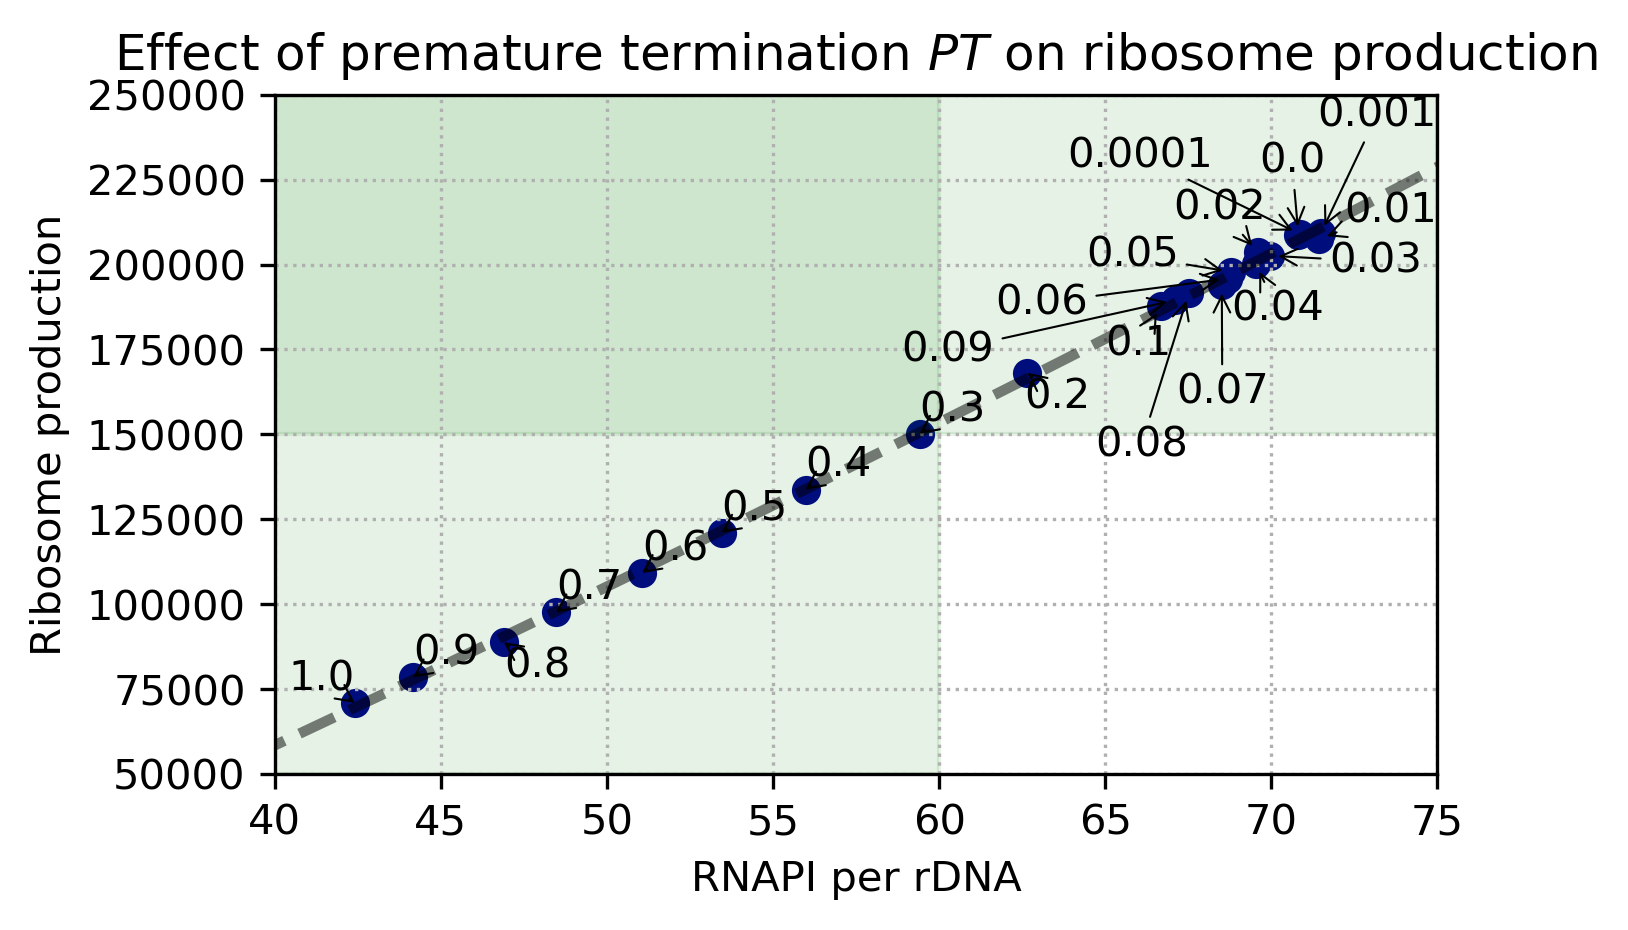

In [13]:
from adjustText import adjust_text

figsize=(5,3)
dpi=300

fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = fig.add_subplot()

x = d['nParticles'].tolist()
y = d['xEnd'].tolist()

ax1.scatter(x ,y,color='darkblue')

#points labels
texts=[]
s = [str(i) for i in d['preTermProb'].tolist()]
for t in zip(x,y,s):
    texts.append(ax1.text(t[0],t[1],t[2]))

ax1.axvspan(40,60,color='green',alpha=0.1)
ax1.axhspan(150000,250000,color='green',alpha=0.1)
    
# fit regression line
z = np.polyfit(x, y, deg=2)
p2 = np.poly1d(z)

# Plot regression line
xseq = np.linspace(0, 90, num=100)
ax1.plot(xseq, p2(xseq), "--", color="k", lw=2.5, alpha=0.5);
    
ax1.set_xlim(40,75)
ax1.set_ylim(50000,250000)

ax1.grid(True,ls="dotted")
ax1.set_xlabel('RNAPI per rDNA')
ax1.set_ylabel('Ribosome production')
plt.title('Effect of premature termination '+'$\it{PT}$'+' on ribosome production')
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))
plt.savefig(fname="Fig_M_Aalt1.png",dpi=dpi,format='png',bbox_inches='tight', transparent=False)

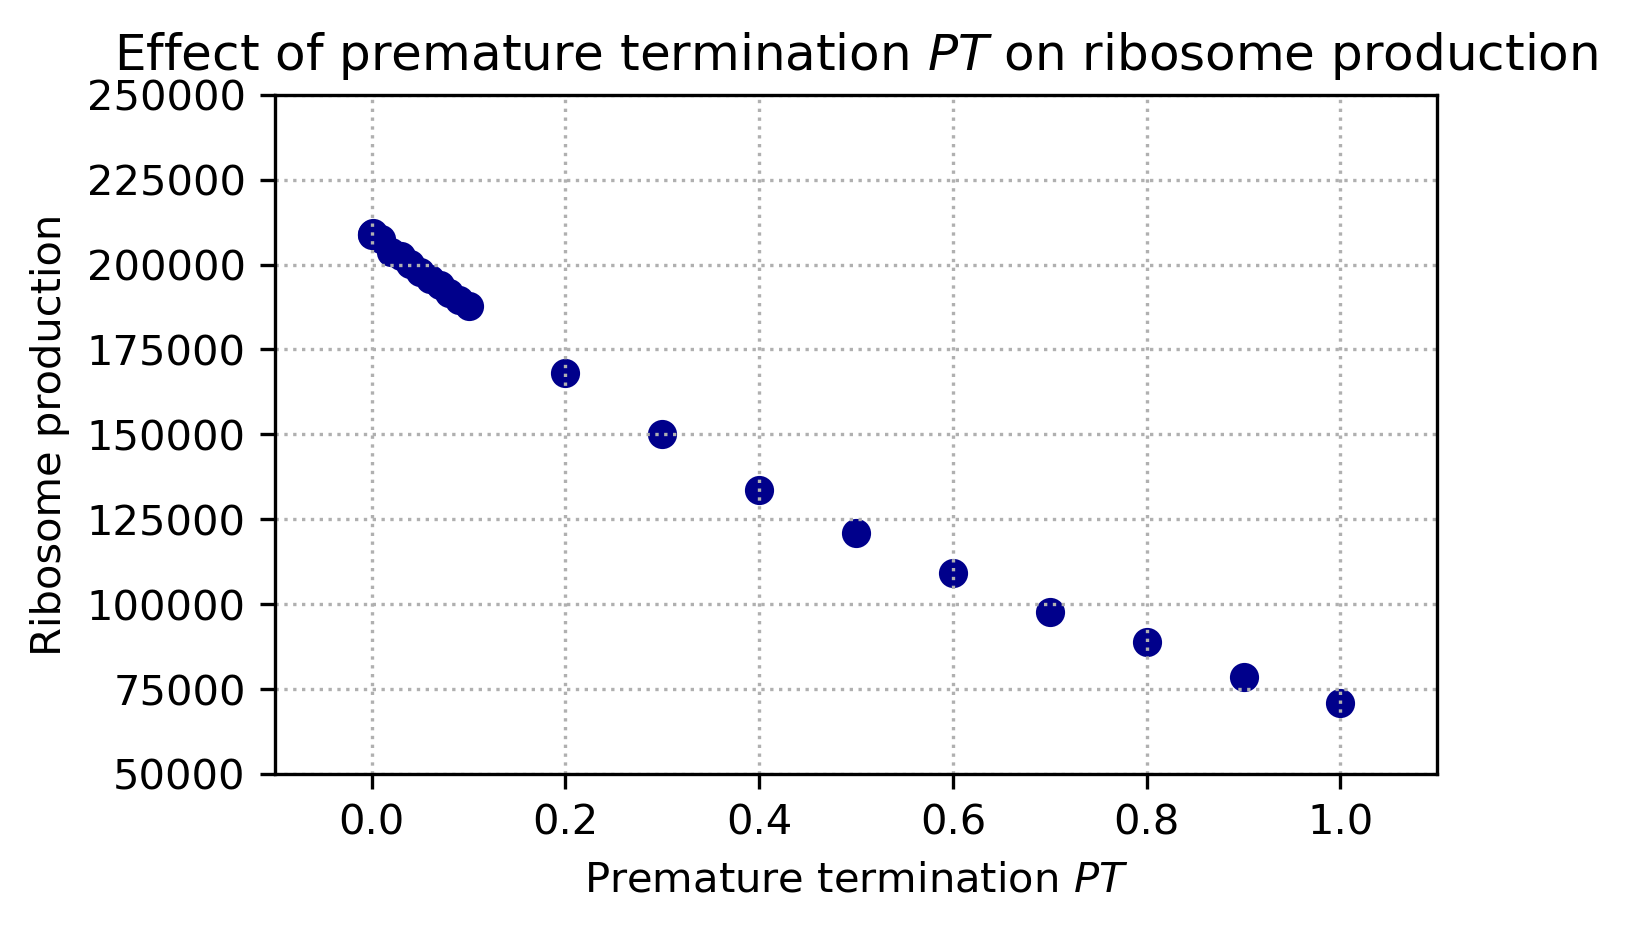

In [14]:
figsize=(5,3)
dpi=300

fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = fig.add_subplot()

x = d['preTermProb'].tolist()
y = d['xEnd'].tolist()

ax1.scatter(x ,y,color='darkblue')
    
ax1.set_xlim(-0.1,1.1)
ax1.set_ylim(50000,250000)

ax1.grid(True,ls="dotted")
ax1.set_xlabel('Premature termination '+'$\it{PT}$')
ax1.set_ylabel('Ribosome production')
plt.title('Effect of premature termination '+'$\it{PT}$'+' on ribosome production')
plt.savefig(fname="Fig_M_Aalt2.png",dpi=dpi,format='png',bbox_inches='tight', transparent=False)

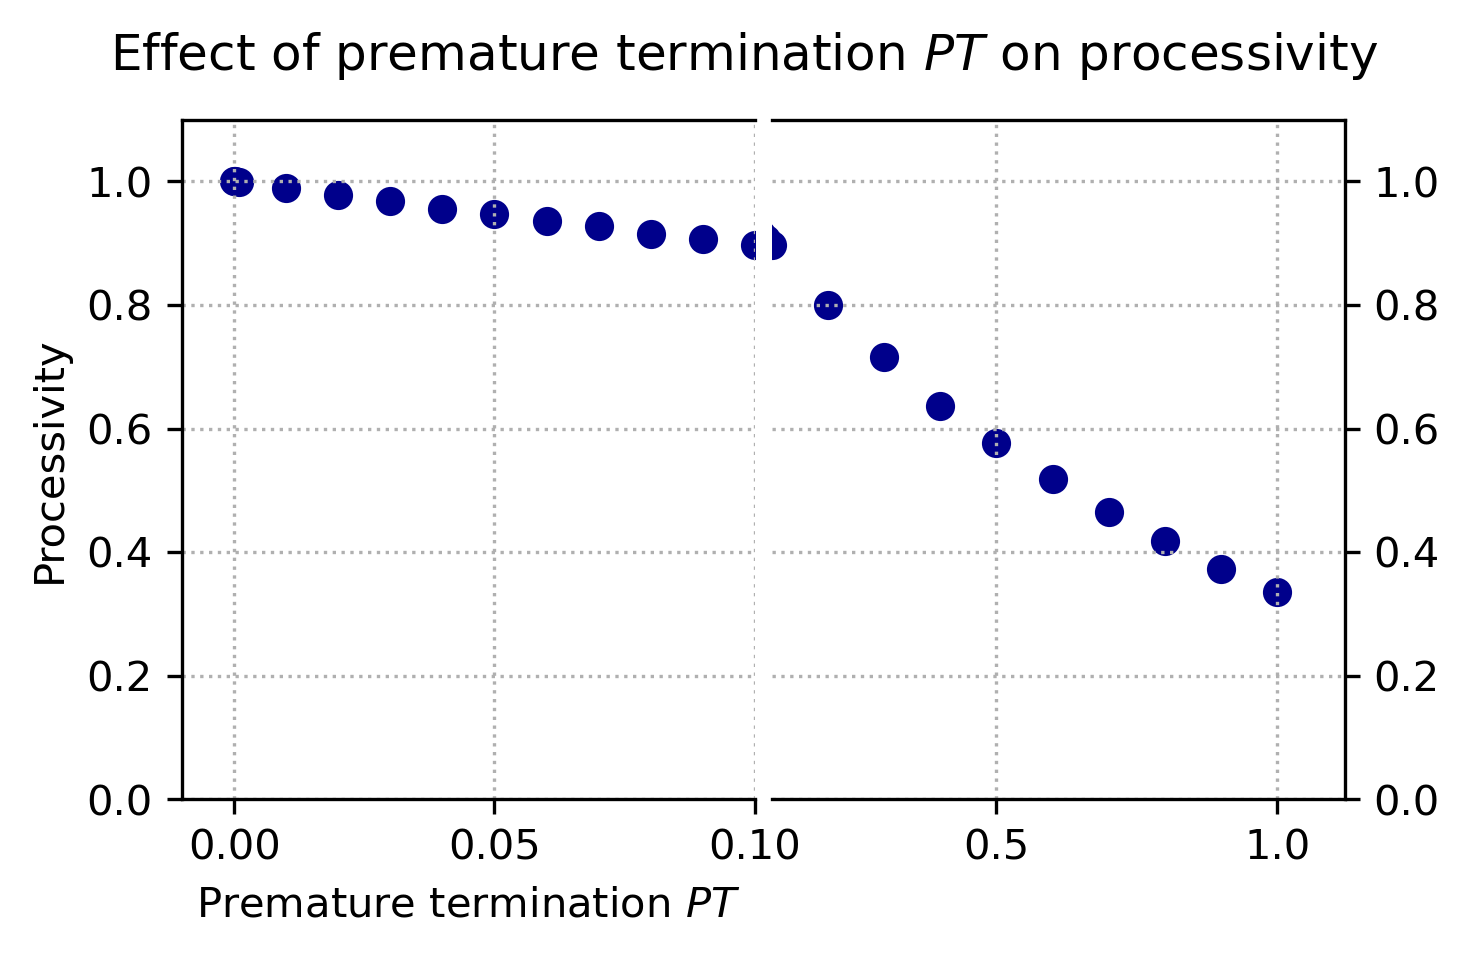

In [15]:
figsize=(5,3)
dpi=300

fig = plt.figure(figsize=figsize, dpi=dpi)
fig.suptitle('Effect of premature termination '+'$\it{PT}$'+' on processivity')

ax1 = fig.add_subplot(1,2,1)

x = d['preTermProb'].tolist()
y = d['processivity'].tolist()

ax1.scatter(x ,y,color='darkblue')
    
# ax1.set_ylim(0.8,1.05)
ax1.set_ylim(0,1.1)
ax1.set_xlim(-0.01,0.1)

ax1.grid(True,ls="dotted")
ax1.set_xlabel('Premature termination '+'$\it{PT}$')
ax1.set_ylabel('Processivity')

ax1.spines['right'].set_visible(False)

ax2 = fig.add_subplot(1,2,2)

x = d['preTermProb'].tolist()
y = d['processivity'].tolist()

ax2.scatter(x ,y,color='darkblue')
    
ax2.set_ylim(0,1.1)
ax2.set_xlim(0.1,1.12)

ax2.grid(True,ls="dotted")
# ax2.set_xlabel('Premature termination '+'$\it{PT}$')
ax2.spines['left'].set_visible(False)

ax1.yaxis.tick_left()
ax2.yaxis.tick_right()

# Make the spacing between the two axes a bit smaller
plt.subplots_adjust(wspace=0.03)


plt.savefig(fname="Fig_M_A.png",dpi=dpi,format='png',bbox_inches='tight', transparent=False)

In [16]:
d = data[(data['modelType']=='discrete') & (data['preTermProb']==0) & (data['preTermDist']==0)]
d

time  c dist v5end addProb vInt preTermProb preTermDist  \
discrete_0.1  6000  0    0     0     0.1   50           0           0   
discrete_0.2  6000  0    0     0     0.2   50           0           0   
discrete_0.3  6000  0    0     0     0.3   50           0           0   
discrete_0.4  6000  0    0     0     0.4   50           0           0   
discrete_0.9  6000  0    0     0     0.9   50           0           0   
discrete_1.0  6000  0    0     0       1   50           0           0   
discrete_0.5  6000  0    0     0     0.5   50           0           0   
discrete_0.6  6000  0    0     0     0.6   50           0           0   
discrete_0.7  6000  0    0     0     0.7   50           0           0   
discrete_0.8  6000  0    0     0     0.8   50           0           0   

             nParticles     xEnd xEndPremature   tTaken processivity modelType  
discrete_0.1    13.3907  40673.4             0  146.476            1  discrete  
discrete_0.2    24.8595  75304.7             0  146.718            1  discrete  
discrete_0.3    34.8194   105323             0  146.962            1  discrete  
discrete_0.4    43.3513   130875             0  147.235            1  discrete  
discrete_0.9    77.2823   223073             0  148.524            1  discrete  
discrete_1.0    81.5669   236517             0  148.772            1  discrete  
discrete_0.5    51.2898   154697             0  147.488            1  discrete  
discrete_0.6    57.8215   174056             0  147.705            1  discrete  
discrete_0.7    64.6006   193205             0  147.988            1  discrete  
discrete_0.8    71.2136   208655             0  148.233            1  discrete

            2
-1.441e+05 x + 3.742e+05 x + 3550
 
3.264e+05 x + 5155


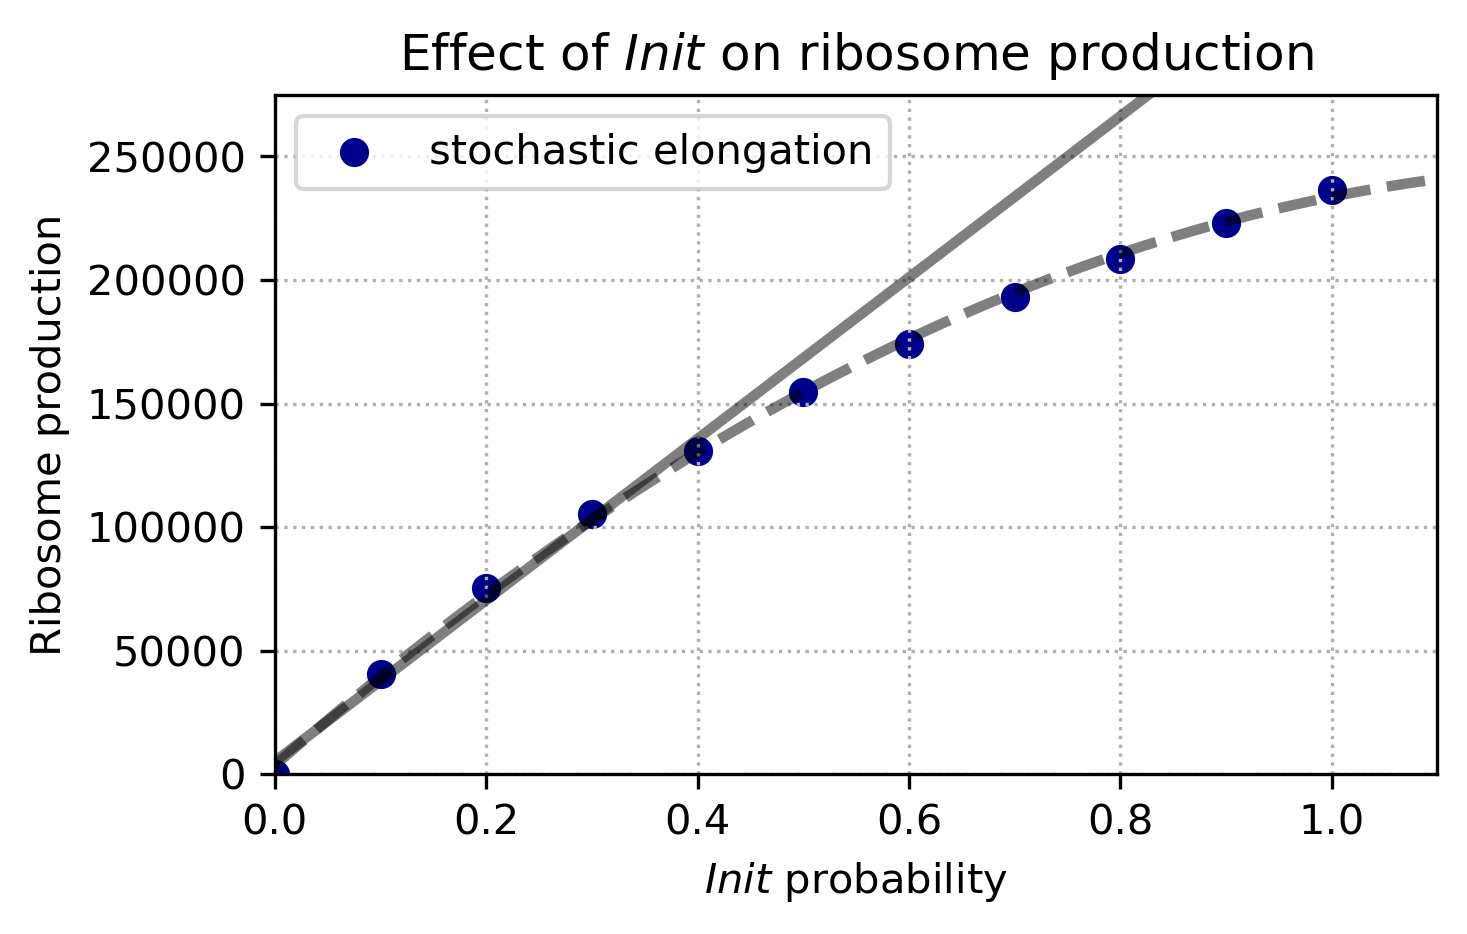

In [17]:
figsize=(5,3)
dpi=300

fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = fig.add_subplot()

x = [0]+d['addProb'].tolist()
y = [0]+d['xEnd'].tolist()

ax1.scatter(x ,y, color='darkblue',label='stochastic elongation')

# fit regression line
z = np.polyfit(x, y, deg=2)
p2 = np.poly1d(z)
print(p2)

# Plot regression line
xseq = np.linspace(0, 1.1, num=100)
ax1.plot(xseq, p2(xseq), "--", color="k", lw=2.5, alpha=0.5)

# fit regression line
z = np.polyfit(x[:5], y[:5], deg=1)
p2 = np.poly1d(z)
print(p2)

# Plot regression line
xseq = np.linspace(0, 1.1, num=100)
ax1.plot(xseq, p2(xseq), "-", color="k", lw=2.5, alpha=0.5)

ax1.set_xlim(0,1.1)
ax1.set_ylim(0,275000)

ax1.grid(True,ls="dotted")
ax1.set_xlabel('$\it{Init}$'+' probability')
ax1.set_ylabel('Ribosome production')
# ax1.set_ylabel('Ribosome production [100 min$^{-1}$]')

plt.legend()
plt.title('Effect of '+'$\it{Init}$'+' on ribosome production')
plt.savefig(fname="Fig_M_B.png",dpi=dpi,format='png',bbox_inches='tight', transparent=False)

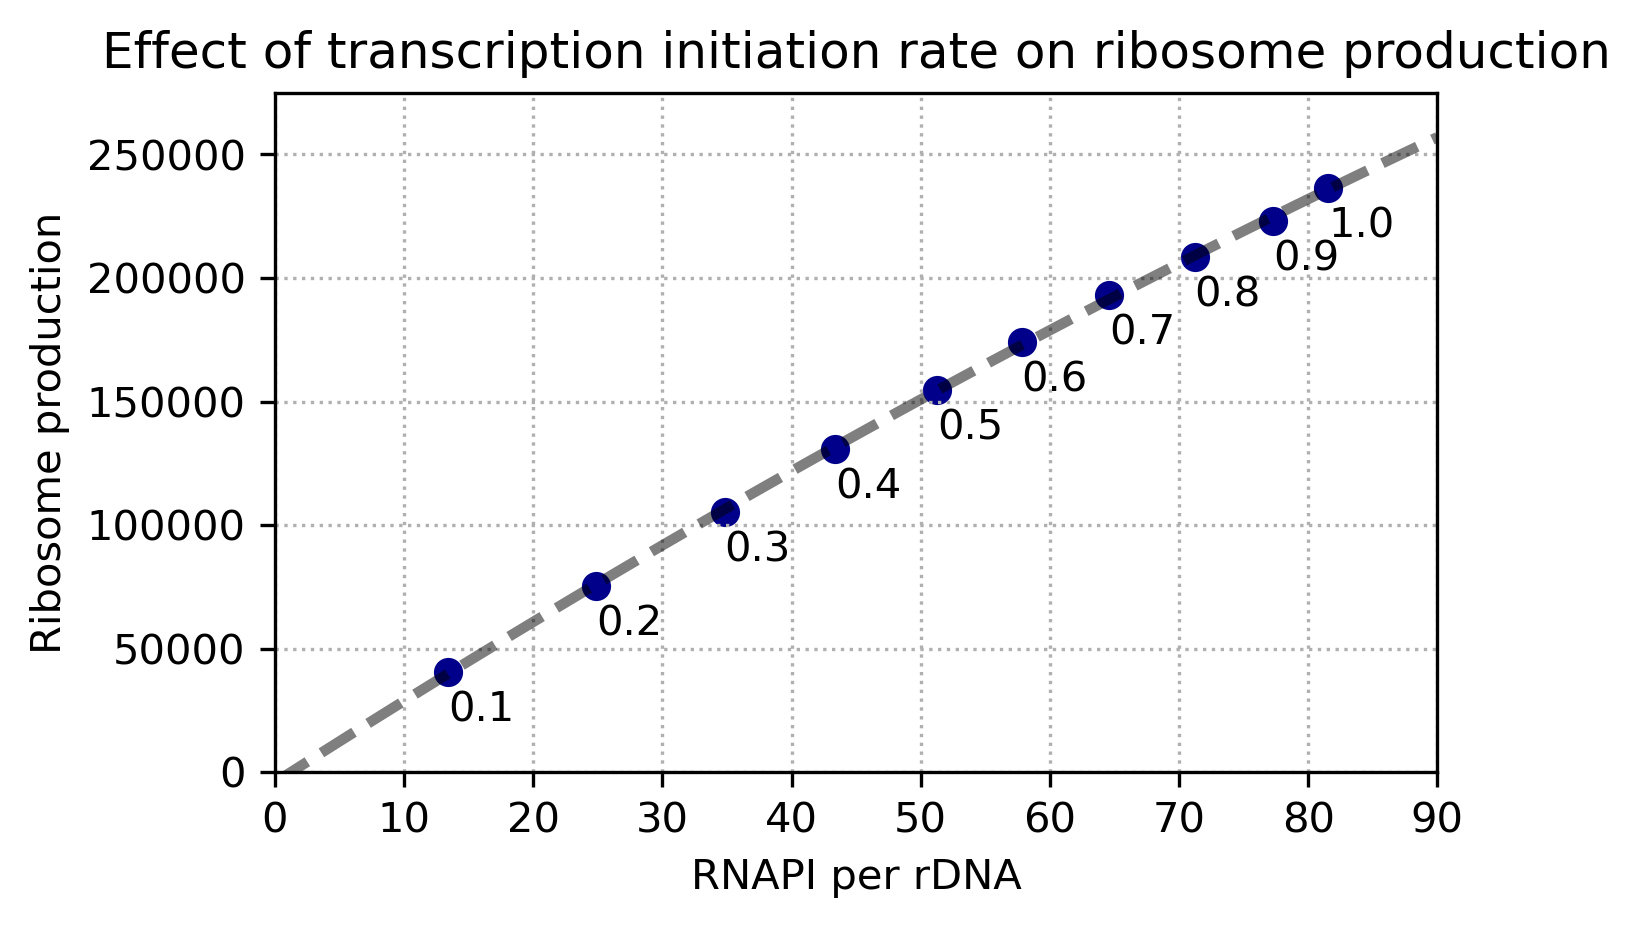

In [18]:
figsize=(5,3)
dpi=300

fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = fig.add_subplot()

x = d['nParticles'].tolist()
y = d['xEnd'].tolist()

ax1.scatter(x ,y, color='darkblue')

#points labels
s = [str(i) for i in d['addProb'].tolist()]
for t in zip(x,y,s):
    ax1.text(t[0],t[1]-20000,t[2])

# fit regression line
z = np.polyfit(x, y, deg=2)
p2 = np.poly1d(z)

# Plot regression line
xseq = np.linspace(0, 90, num=100)
ax1.plot(xseq, p2(xseq), "--", color="k", lw=2.5, alpha=0.5)
    
ax1.set_xlim(0,90)
ax1.set_ylim(0,275000)

ax1.grid(True,ls="dotted")
ax1.set_xlabel('RNAPI per rDNA')
ax1.set_ylabel('Ribosome production')
plt.title('Effect of transcription initiation rate on ribosome production')
plt.savefig(fname="Fig_M_Balt1.png",dpi=dpi,format='png',bbox_inches='tight', transparent=False)

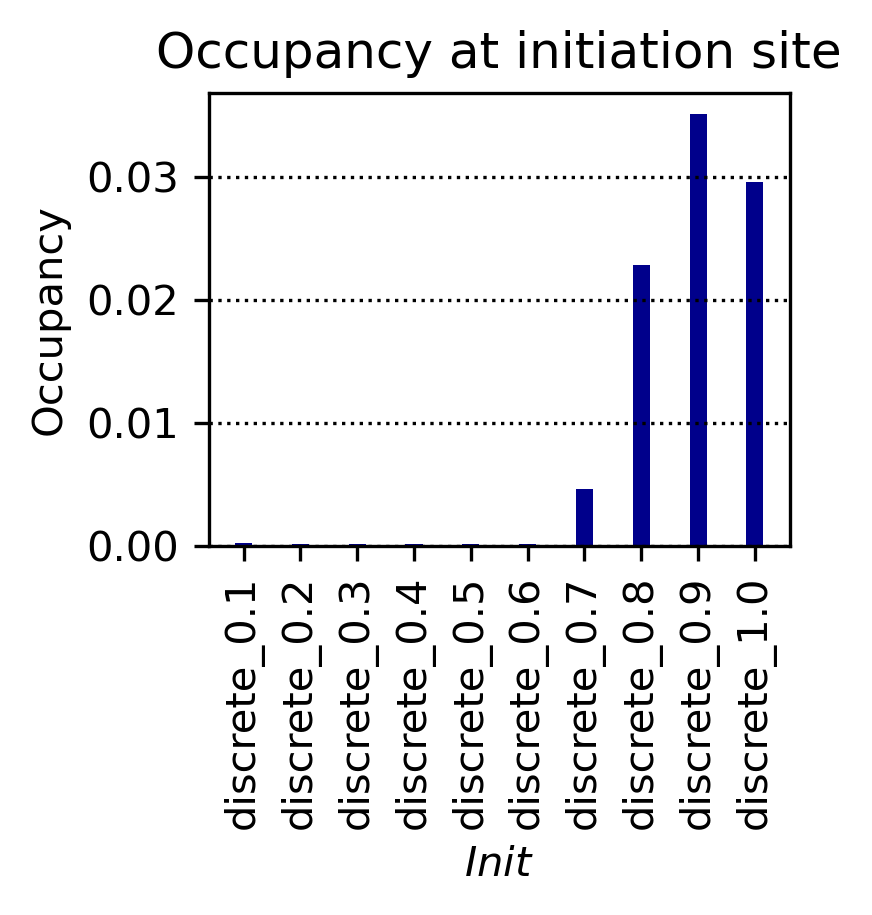

In [19]:
names = d.index.tolist()
peak_value = df01_plots[names].T[0].sort_index()

dpi=300

fig = plt.figure(figsize=(len(peak_value) / 4, 2), dpi=dpi)
ax1 = fig.add_subplot()

x = np.arange(len(peak_value))
width = 0.3

plt.title('Occupancy at initiation site')
ax1.bar(x, peak_value.tolist(), width, color='darkblue')
ax1.set_ylabel('Occupancy')
ax1.set_xlabel('$\it{Init}$')
ax1.grid(axis='y', c='black', ls="dotted")
plt.xticks(x, peak_value.index.tolist(), rotation=90)

plt.savefig(fname="Fig_M_C.png",dpi=dpi,format='png',bbox_inches='tight', transparent=False)

In [22]:
data['modelType'].unique()

array(['discrete', 'torsion', 'LER', 'RNA', 'RNApreElong', 'full',
       'fullnoLTRpreElong'], dtype=object)

In [53]:
d = data[(data['modelType']=='RNA')]
d

time  c dist v5end addProb vInt preTermProb preTermDist  \
RNA_0.8_term_0     6000  0    0     0     0.8   50           0        6750   
RNA_0.8_term_0.01  6000  0    0     0     0.8   50        0.01        6750   
RNA_0.8_term_0.02  6000  0    0     0     0.8   50        0.02        6750   
RNA_0.8_term_0.03  6000  0    0     0     0.8   50        0.03        6750   
RNA_0.8_term_0.04  6000  0    0     0     0.8   50        0.04        6750   
RNA_0.8_term_0.05  6000  0    0     0     0.8   50        0.05        6750   
RNA_0.8_term_0.06  6000  0    0     0     0.8   50        0.06        6750   
RNA_0.8_term_0.2   6000  0    0     0     0.8   50         0.2        6750   
RNA_0.8_term_0.3   6000  0    0     0     0.8   50         0.3        6750   
RNA_0.8_term_0.4   6000  0    0     0     0.8   50         0.4        6750   
RNA_0.8_term_0.5   6000  0    0     0     0.8   50         0.5        6750   
RNA_0.8_term_0.6   6000  0    0     0     0.8   50         0.6        6750   
RNA_0.8_term_0.7   6000  0    0     0     0.8   50         0.7        6750   
RNA_0.8_term_0.8   6000  0    0     0     0.8   50         0.8        6750   
RNA_0.8_term_0.9   6000  0    0     0     0.8   50         0.9        6750   
RNA_0.8_term_1.0   6000  0    0     0     0.8   50           1        6750   
RNA_0.8_term_0.07  6000  0    0     0     0.8   50        0.07        6750   
RNA_0.8_term_0.08  6000  0    0     0     0.8   50        0.08        6750   
RNA_0.8_term_0.09  6000  0    0     0     0.8   50        0.09        6750   
RNA_0.8_term_0.1   6000  0    0     0     0.8   50         0.1        6750   

                  nParticles     xEnd xEndPremature   tTaken processivity  \
RNA_0.8_term_0       51.1444   198900             0  114.646            1   
RNA_0.8_term_0.01    50.9448   197386       1776.56  114.638      0.99108   
RNA_0.8_term_0.02    50.8181   196162       3389.06  114.651     0.983017   
RNA_0.8_term_0.03    50.7183   194723       5156.25  114.651     0.974203   
RNA_0.8_term_0.04    50.2131   191991        6712.5  114.628     0.966218   
RNA_0.8_term_0.05    50.4441   192117       8296.88   114.64     0.958601   
RNA_0.8_term_0.06    50.1008   190064          9825  114.629     0.950848   
RNA_0.8_term_0.2     46.9883   167756       31359.4  114.551     0.842507   
RNA_0.8_term_0.3     45.5431   156380       44240.6  114.516     0.779481   
RNA_0.8_term_0.4     43.3877   142055       57478.1  114.476     0.711936   
RNA_0.8_term_0.5     42.1089   131775       69792.2  114.441     0.653752   
RNA_0.8_term_0.6     39.9967   119564       80329.7  114.405     0.598138   
RNA_0.8_term_0.7     38.5977   110395       90534.4  114.375     0.549423   
RNA_0.8_term_0.8     37.2188   101681         99750  114.331     0.504794   
RNA_0.8_term_0.9     35.7505  93267.2        107658   114.32     0.464189   
RNA_0.8_term_1.0     34.5563  85790.6        114398  114.303     0.428548   
RNA_0.8_term_0.07    49.5676   187209       11460.9   114.62     0.942312   
RNA_0.8_term_0.08    49.5154   186216       13035.9  114.622     0.934575   
RNA_0.8_term_0.09    49.4594   185414       14615.6  114.618     0.926933   
RNA_0.8_term_0.1     49.2237   183773       15928.1  114.598      0.92024   

                  modelType  
RNA_0.8_term_0          RNA  
RNA_0.8_term_0.01       RNA  
RNA_0.8_term_0.02       RNA  
RNA_0.8_term_0.03       RNA  
RNA_0.8_term_0.04       RNA  
RNA_0.8_term_0.05       RNA  
RNA_0.8_term_0.06       RNA  
RNA_0.8_term_0.2        RNA  
RNA_0.8_term_0.3        RNA  
RNA_0.8_term_0.4        RNA  
RNA_0.8_term_0.5        RNA  
RNA_0.8_term_0.6        RNA  
RNA_0.8_term_0.7        RNA  
RNA_0.8_term_0.8        RNA  
RNA_0.8_term_0.9        RNA  
RNA_0.8_term_1.0        RNA  
RNA_0.8_term_0.07       RNA  
RNA_0.8_term_0.08       RNA  
RNA_0.8_term_0.09       RNA  
RNA_0.8_term_0.1        RNA

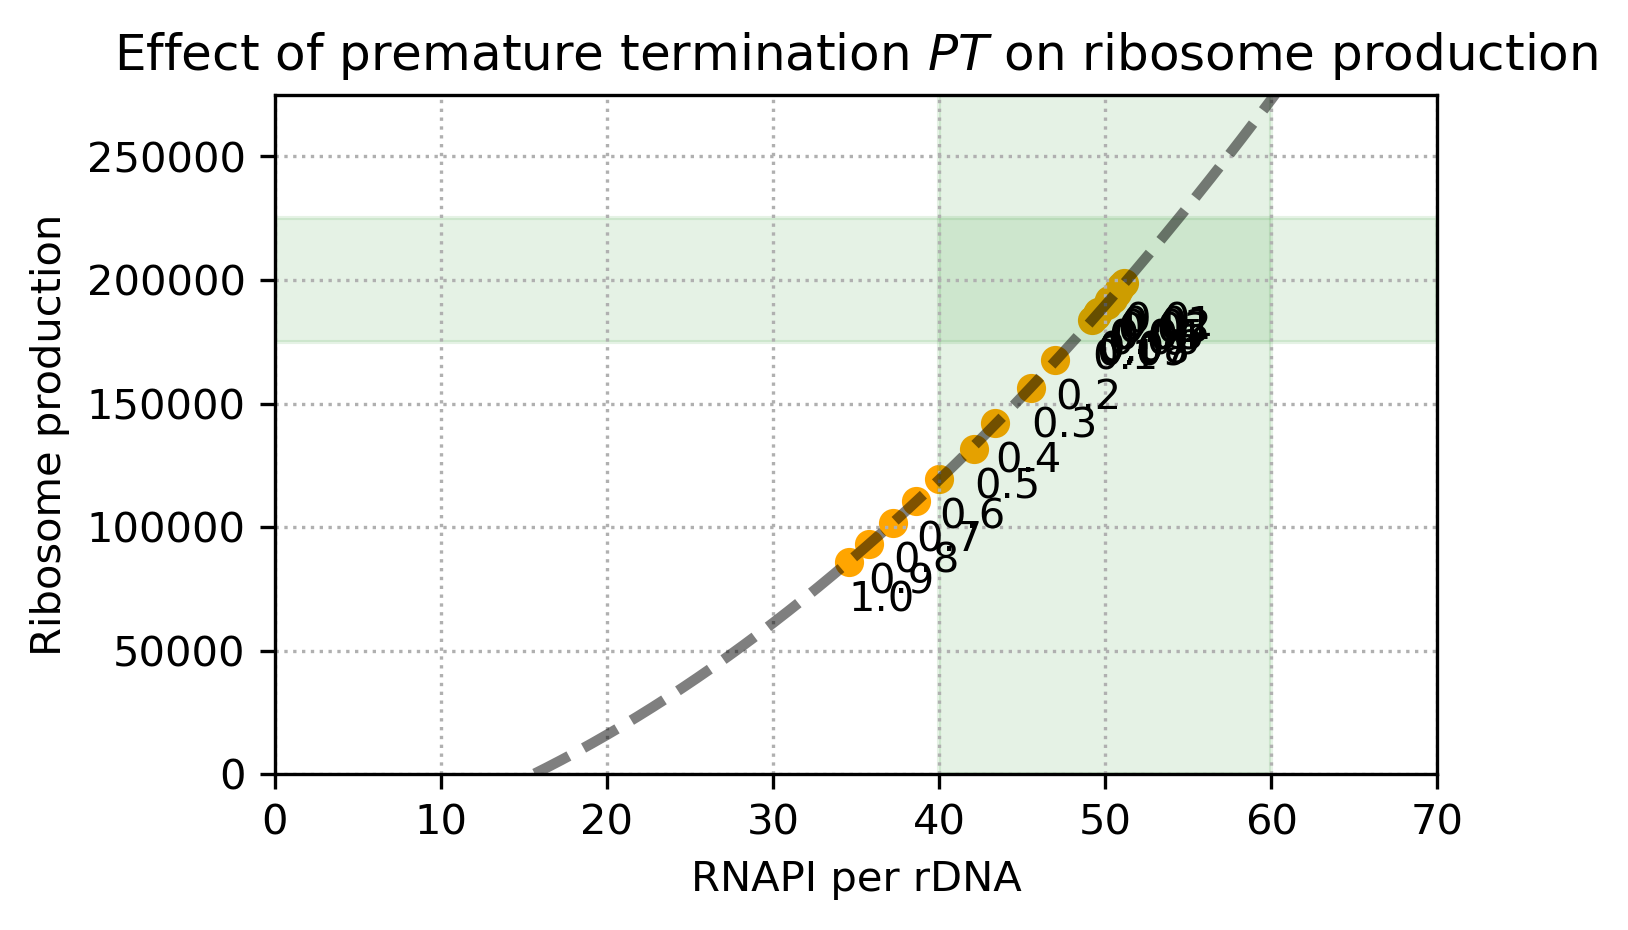

In [54]:
figsize=(5,3)
dpi=300

fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = fig.add_subplot()

x = d['nParticles'].tolist()
y = d['xEnd'].tolist()

ax1.scatter(x ,y, color='orange')

#points labels
s = [str(i) for i in d['preTermProb'].tolist()]
for t in zip(x,y,s):
    ax1.text(t[0],t[1]-20000,t[2])

# fit regression line
z = np.polyfit(x, y, deg=2)
p2 = np.poly1d(z)

# Plot regression line
xseq = np.linspace(0, 90, num=100)
ax1.plot(xseq, p2(xseq), "--", color="k", lw=2.5, alpha=0.5)
    
ax1.set_xlim(0,70)
ax1.set_ylim(0,275000)

ax1.axvspan(40,60,color='green',alpha=0.1)
ax1.axhspan(175000,225000,color='green',alpha=0.1)

ax1.grid(True,ls="dotted")
ax1.set_xlabel('RNAPI per rDNA')
ax1.set_ylabel('Ribosome production')
plt.title('Effect of premature termination '+'$\it{PT}$'+' on ribosome production')
plt.savefig(fname="Fig_N_A.png",dpi=dpi,format='png',bbox_inches='tight', transparent=False)

In [56]:
d

time  c dist v5end addProb vInt preTermProb preTermDist  \
RNA_0.8_term_0     6000  0    0     0     0.8   50           0        6750   
RNA_0.8_term_0.01  6000  0    0     0     0.8   50        0.01        6750   
RNA_0.8_term_0.02  6000  0    0     0     0.8   50        0.02        6750   
RNA_0.8_term_0.03  6000  0    0     0     0.8   50        0.03        6750   
RNA_0.8_term_0.04  6000  0    0     0     0.8   50        0.04        6750   
RNA_0.8_term_0.05  6000  0    0     0     0.8   50        0.05        6750   
RNA_0.8_term_0.06  6000  0    0     0     0.8   50        0.06        6750   
RNA_0.8_term_0.2   6000  0    0     0     0.8   50         0.2        6750   
RNA_0.8_term_0.3   6000  0    0     0     0.8   50         0.3        6750   
RNA_0.8_term_0.4   6000  0    0     0     0.8   50         0.4        6750   
RNA_0.8_term_0.5   6000  0    0     0     0.8   50         0.5        6750   
RNA_0.8_term_0.6   6000  0    0     0     0.8   50         0.6        6750   
RNA_0.8_term_0.7   6000  0    0     0     0.8   50         0.7        6750   
RNA_0.8_term_0.8   6000  0    0     0     0.8   50         0.8        6750   
RNA_0.8_term_0.9   6000  0    0     0     0.8   50         0.9        6750   
RNA_0.8_term_1.0   6000  0    0     0     0.8   50           1        6750   
RNA_0.8_term_0.07  6000  0    0     0     0.8   50        0.07        6750   
RNA_0.8_term_0.08  6000  0    0     0     0.8   50        0.08        6750   
RNA_0.8_term_0.09  6000  0    0     0     0.8   50        0.09        6750   
RNA_0.8_term_0.1   6000  0    0     0     0.8   50         0.1        6750   

                  nParticles     xEnd xEndPremature   tTaken processivity  \
RNA_0.8_term_0       51.1444   198900             0  114.646            1   
RNA_0.8_term_0.01    50.9448   197386       1776.56  114.638      0.99108   
RNA_0.8_term_0.02    50.8181   196162       3389.06  114.651     0.983017   
RNA_0.8_term_0.03    50.7183   194723       5156.25  114.651     0.974203   
RNA_0.8_term_0.04    50.2131   191991        6712.5  114.628     0.966218   
RNA_0.8_term_0.05    50.4441   192117       8296.88   114.64     0.958601   
RNA_0.8_term_0.06    50.1008   190064          9825  114.629     0.950848   
RNA_0.8_term_0.2     46.9883   167756       31359.4  114.551     0.842507   
RNA_0.8_term_0.3     45.5431   156380       44240.6  114.516     0.779481   
RNA_0.8_term_0.4     43.3877   142055       57478.1  114.476     0.711936   
RNA_0.8_term_0.5     42.1089   131775       69792.2  114.441     0.653752   
RNA_0.8_term_0.6     39.9967   119564       80329.7  114.405     0.598138   
RNA_0.8_term_0.7     38.5977   110395       90534.4  114.375     0.549423   
RNA_0.8_term_0.8     37.2188   101681         99750  114.331     0.504794   
RNA_0.8_term_0.9     35.7505  93267.2        107658   114.32     0.464189   
RNA_0.8_term_1.0     34.5563  85790.6        114398  114.303     0.428548   
RNA_0.8_term_0.07    49.5676   187209       11460.9   114.62     0.942312   
RNA_0.8_term_0.08    49.5154   186216       13035.9  114.622     0.934575   
RNA_0.8_term_0.09    49.4594   185414       14615.6  114.618     0.926933   
RNA_0.8_term_0.1     49.2237   183773       15928.1  114.598      0.92024   

                  modelType  
RNA_0.8_term_0          RNA  
RNA_0.8_term_0.01       RNA  
RNA_0.8_term_0.02       RNA  
RNA_0.8_term_0.03       RNA  
RNA_0.8_term_0.04       RNA  
RNA_0.8_term_0.05       RNA  
RNA_0.8_term_0.06       RNA  
RNA_0.8_term_0.2        RNA  
RNA_0.8_term_0.3        RNA  
RNA_0.8_term_0.4        RNA  
RNA_0.8_term_0.5        RNA  
RNA_0.8_term_0.6        RNA  
RNA_0.8_term_0.7        RNA  
RNA_0.8_term_0.8        RNA  
RNA_0.8_term_0.9        RNA  
RNA_0.8_term_1.0        RNA  
RNA_0.8_term_0.07       RNA  
RNA_0.8_term_0.08       RNA  
RNA_0.8_term_0.09       RNA  
RNA_0.8_term_0.1        RNA

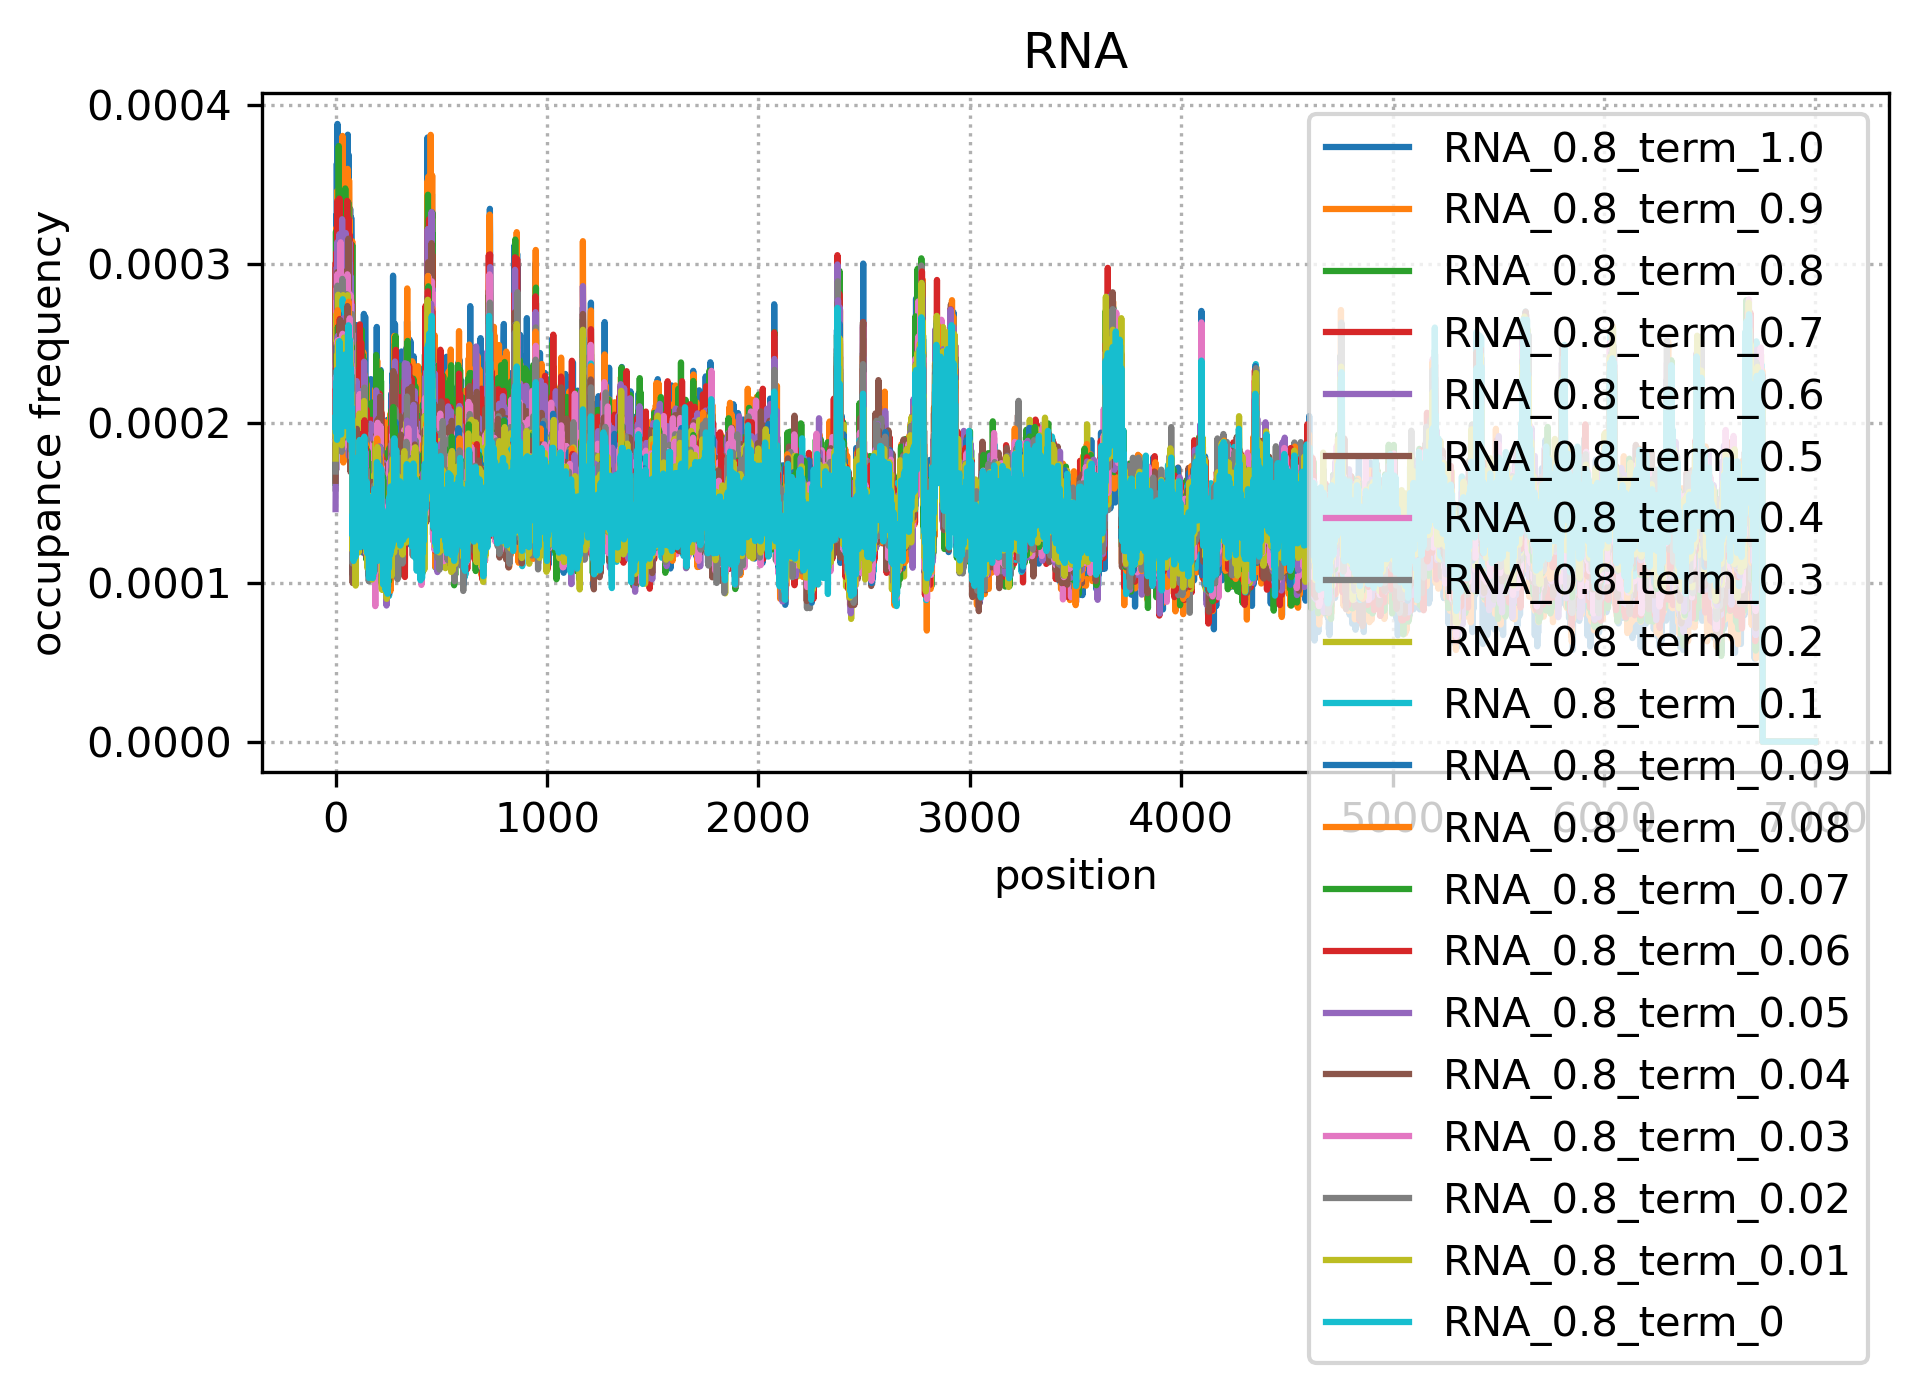

In [59]:
figsize=(7,3)
df_temp = d.sort_values('preTermProb',ascending=False)

fig = plt.figure(figsize=figsize, dpi=300)
ax1 = fig.add_subplot()
a = df01_plots.index.tolist()

for i in df_temp.index:       
    b = df01_plots[i].tolist()
    ax1.plot(a ,b ,label=i)

ax1.legend()
ax1.grid(True,ls="dotted")
ax1.set_xlabel('position')
ax1.set_ylabel('occupance frequency')
plt.title('RNA')
plt.show()

In [42]:
d = data[(data['modelType']=='torsion')]
d

time    c dist v5end addProb vInt preTermProb  \
torsion_0.8_term_0.01  6000  500    0     0     0.8   50        0.01   
torsion_0.8_term_0.02  6000  500    0     0     0.8   50        0.02   
torsion_0.8_term_0.03  6000  500    0     0     0.8   50        0.03   
torsion_0.8_term_0.04  6000  500    0     0     0.8   50        0.04   
torsion_0.8_term_0.05  6000  500    0     0     0.8   50        0.05   
torsion_0.8_term_0.06  6000  500    0     0     0.8   50        0.06   
torsion_0.8_term_0.07  6000  500    0     0     0.8   50        0.07   
torsion_0.8_term_0.08  6000  500    0     0     0.8   50        0.08   
torsion_0.8_term_0.09  6000  500    0     0     0.8   50        0.09   
torsion_0.8_term_0.1   6000  500    0     0     0.8   50         0.1   
torsion_0.8_term_0.2   6000  500    0     0     0.8   50         0.2   
torsion_0.8_term_0.3   6000  500    0     0     0.8   50         0.3   
torsion_0.8_term_0.4   6000  500    0     0     0.8   50         0.4   
torsion_0.8_term_0.5   6000  500    0     0     0.8   50         0.5   
torsion_0.8_term_0.6   6000  500    0     0     0.8   50         0.6   
torsion_0.8_term_0.7   6000  500    0     0     0.8   50         0.7   
torsion_0.8_term_0.8   6000  500    0     0     0.8   50         0.8   
torsion_0.8_term_0.9   6000  500    0     0     0.8   50         0.9   
torsion_0.8_term_1.0   6000  500    0     0     0.8   50           1   
torsion_0.8_term_0     6000  500    0     0     0.8   50           0   

                      preTermDist nParticles     xEnd xEndPremature   tTaken  \
torsion_0.8_term_0.01        6750    70.1618   207609       2235.94  146.594   
torsion_0.8_term_0.02        6750    69.6261   205472       4504.69  146.282   
torsion_0.8_term_0.03        6750    68.6224   203227        6637.5  146.031   
torsion_0.8_term_0.04        6750    67.8617   200920       9051.56  145.798   
torsion_0.8_term_0.05        6750    68.0111   200175       11053.1  145.517   
torsion_0.8_term_0.06        6750    67.6386   197447       13115.6  145.318   
torsion_0.8_term_0.07        6750     66.845   194405       15693.8  145.021   
torsion_0.8_term_0.08        6750      66.22   193458       17203.1  144.876   
torsion_0.8_term_0.09        6750    65.1079   190383       19448.4  144.655   
torsion_0.8_term_0.1         6750    65.0296   189234       21229.7  144.402   
torsion_0.8_term_0.2         6750    60.6723   170227       40443.8  142.467   
torsion_0.8_term_0.3         6750    57.0262   153609       57098.4  140.679   
torsion_0.8_term_0.4         6750    53.6579   138947       71643.8  138.955   
torsion_0.8_term_0.5         6750    50.7761   125798       84993.8   137.25   
torsion_0.8_term_0.6         6750    48.4474   115598       96431.2  135.926   
torsion_0.8_term_0.7         6750    45.9619   105361        106650  134.504   
torsion_0.8_term_0.8         6750    43.6011  95390.6        116536  133.081   
torsion_0.8_term_0.9         6750    41.6756  87689.1        124402  131.956   
torsion_0.8_term_1.0         6750    39.4944  79392.2        133453   130.67   
torsion_0.8_term_0           6750    72.1386   210192             0  146.921   

                      processivity modelType  
torsion_0.8_term_0.01     0.989345   torsion  
torsion_0.8_term_0.02     0.978547   torsion  
torsion_0.8_term_0.03     0.968372   torsion  
torsion_0.8_term_0.04     0.956892   torsion  
torsion_0.8_term_0.05     0.947672   torsion  
torsion_0.8_term_0.06     0.937711   torsion  
torsion_0.8_term_0.07     0.925303   torsion  
torsion_0.8_term_0.08     0.918337   torsion  
torsion_0.8_term_0.09     0.907314   torsion  
torsion_0.8_term_0.1      0.899129   torsion  
torsion_0.8_term_0.2      0.808023   torsion  
torsion_0.8_term_0.3      0.729016   torsion  
torsion_0.8_term_0.4      0.659796   torsion  
torsion_0.8_term_0.5      0.596789   torsion  
torsion_0.8_term_0.6      0.545199   torsion  
torsion_0.8_term_0.7       0.49696   torsion  
torsion_0.8_term_0.8      0.45

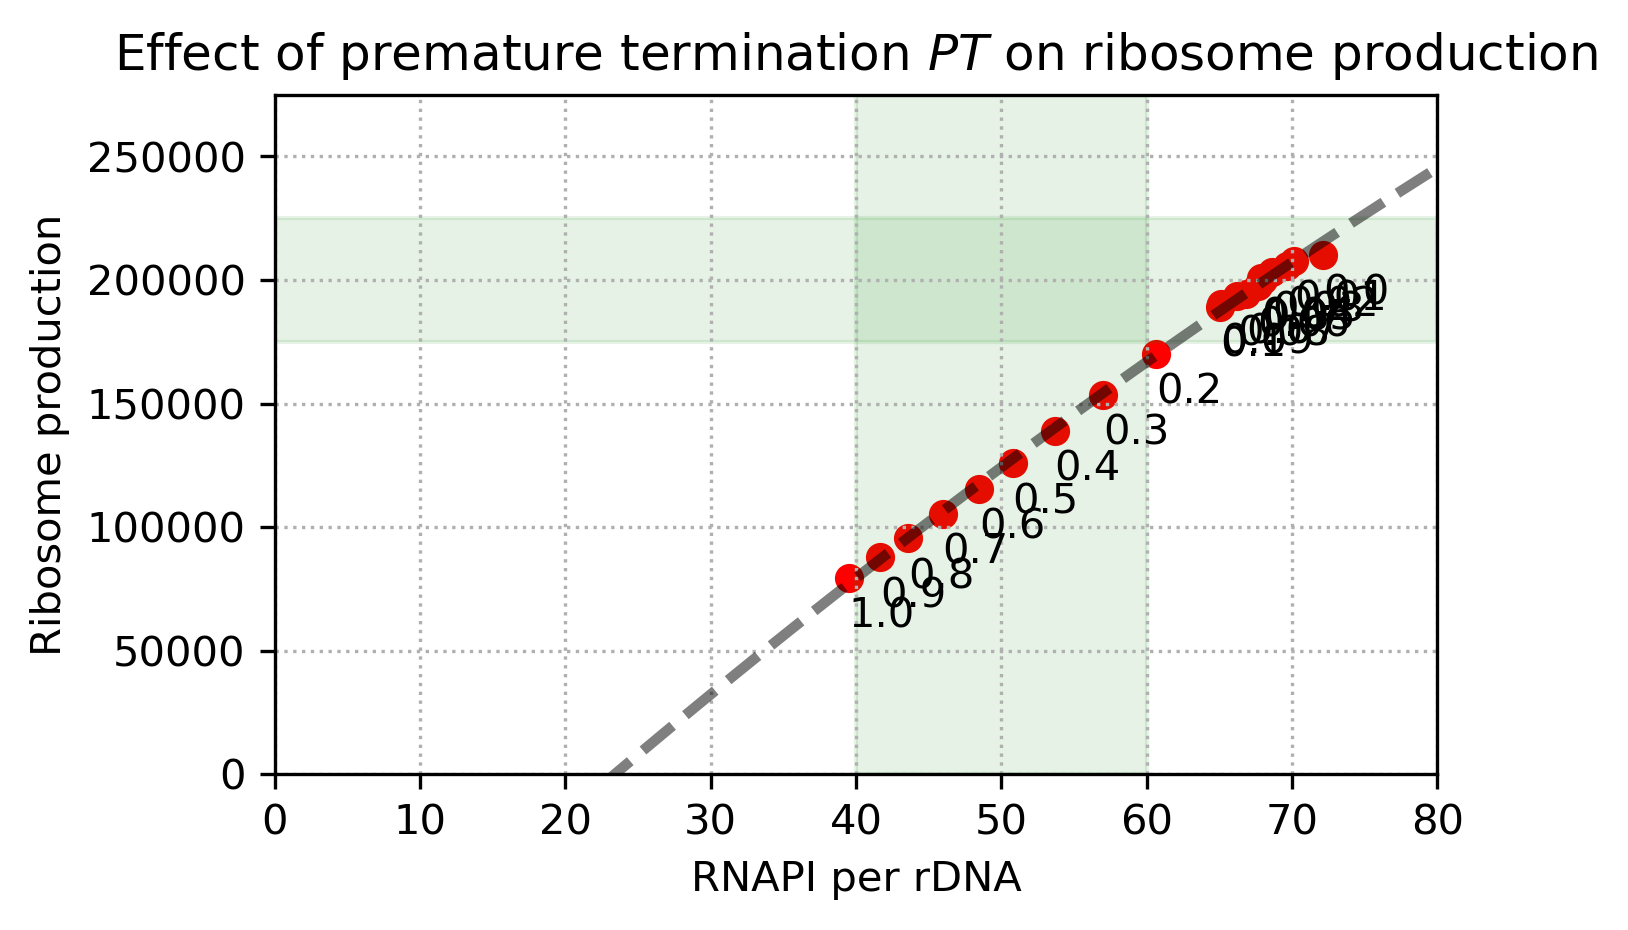

In [46]:
figsize=(5,3)
dpi=300

fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = fig.add_subplot()

x = d['nParticles'].tolist()
y = d['xEnd'].tolist()

ax1.scatter(x ,y, color='red')

#points labels
s = [str(i) for i in d['preTermProb'].tolist()]
for t in zip(x,y,s):
    ax1.text(t[0],t[1]-20000,t[2])

# fit regression line
z = np.polyfit(x, y, deg=2)
p2 = np.poly1d(z)

# Plot regression line
xseq = np.linspace(0, 90, num=100)
ax1.plot(xseq, p2(xseq), "--", color="k", lw=2.5, alpha=0.5)
    
ax1.set_xlim(0,80)
ax1.set_ylim(0,275000)

ax1.axvspan(40,60,color='green',alpha=0.1)
ax1.axhspan(175000,225000,color='green',alpha=0.1)

ax1.grid(True,ls="dotted")
ax1.set_xlabel('RNAPI per rDNA')
ax1.set_ylabel('Ribosome production')
plt.title('Effect of premature termination '+'$\it{PT}$'+' on ribosome production')
plt.savefig(fname="Fig_N_A.png",dpi=dpi,format='png',bbox_inches='tight', transparent=False)

In [48]:
d = data[(data['modelType']=='LER')]
d

time    c  dist v5end addProb vInt preTermProb preTermDist  \
LER_0.8_term_0     6000  500  2000   0.2     0.8   50           0        6750   
LER_0.8_term_0.01  6000  500  2000   0.2     0.8   50        0.01        6750   
LER_0.8_term_0.02  6000  500  2000   0.2     0.8   50        0.02        6750   
LER_0.8_term_0.06  6000  500  2000   0.2     0.8   50        0.06        6750   
LER_0.8_term_0.07  6000  500  2000   0.2     0.8   50        0.07        6750   
LER_0.8_term_0.08  6000  500  2000   0.2     0.8   50        0.08        6750   
LER_0.8_term_0.09  6000  500  2000   0.2     0.8   50        0.09        6750   
LER_0.8_term_0.1   6000  500  2000   0.2     0.8   50         0.1        6750   
LER_0.8_term_0.2   6000  500  2000   0.2     0.8   50         0.2        6750   
LER_0.8_term_0.3   6000  500  2000   0.2     0.8   50         0.3        6750   
LER_0.8_term_0.4   6000  500  2000   0.2     0.8   50         0.4        6750   
LER_0.8_term_0.03  6000  500  2000   0.2     0.8   50        0.03        6750   
LER_0.8_term_0.5   6000  500  2000   0.2     0.8   50         0.5        6750   
LER_0.8_term_0.6   6000  500  2000   0.2     0.8   50         0.6        6750   
LER_0.8_term_0.7   6000  500  2000   0.2     0.8   50         0.7        6750   
LER_0.8_term_0.8   6000  500  2000   0.2     0.8   50         0.8        6750   
LER_0.8_term_0.9   6000  500  2000   0.2     0.8   50         0.9        6750   
LER_0.8_term_1.0   6000  500  2000   0.2     0.8   50           1        6750   
LER_0.8_term_0.04  6000  500  2000   0.2     0.8   50        0.04        6750   
LER_0.8_term_0.05  6000  500  2000   0.2     0.8   50        0.05        6750   

                  nParticles     xEnd xEndPremature   tTaken processivity  \
LER_0.8_term_0       64.2357   187983             0  151.589            1   
LER_0.8_term_0.01    64.1632   187308       2053.12  151.372     0.989158   
LER_0.8_term_0.02    63.6345   184880       4148.44  151.141     0.978054   
LER_0.8_term_0.06    62.1818   177797       12459.4  150.324     0.934513   
LER_0.8_term_0.07     61.859   176250       14235.9  150.144     0.925265   
LER_0.8_term_0.08    61.3337   173953       16176.6  149.959     0.914918   
LER_0.8_term_0.09    61.0243   171923       18337.5  149.788     0.903619   
LER_0.8_term_0.1     60.5977   170358       20179.7  149.582     0.894091   
LER_0.8_term_0.2     56.9244   152841       38151.6  147.887     0.800245   
LER_0.8_term_0.3     53.2457   137414       51960.9  146.328     0.725619   
LER_0.8_term_0.4     50.2025   123670       66768.8   144.72     0.649396   
LER_0.8_term_0.03    63.2149   182794       6220.31  150.881     0.967091   
LER_0.8_term_0.5     47.6224   112266       78848.4  143.129     0.587427   
LER_0.8_term_0.6     45.0699   101672       89896.9  141.534     0.530733   
LER_0.8_term_0.7     42.7522  92264.1        100369  140.144     0.478963   
LER_0.8_term_0.8     40.3505  83310.9        108192  138.561     0.435037   
LER_0.8_term_0.9     38.8482  76753.1        116508  137.106     0.397148   
LER_0.8_term_1.0     36.5279  69164.1        122517  135.698     0.360829   
LER_0.8_term_0.04    62.8316   181228       8217.19  150.736     0.956625   
LER_0.8_term_0.05    62.7421   180056       10359.4  150.531     0.945596   

                  modelType  
LER_0.8_term_0          LER  
LER_0.8_term_0.01       LER  
LER_0.8_term_0.02       LER  
LER_0.8_term_0.06       LER  
LER_0.8_term_0.07       LER  
LER_0.8_term_0.08       LER  
LER_0.8_term_0.09       LER  
LER_0.8_term_0.1        LER  
LER_0.8_term_0.2        LER  
LER_0.8_term_0.3        LER  
LER_0.8_term_0.4        LER  
LER_0.8_term_0.03       LER  
LER_0.8_term_0.5        LER  
LER_0.8_term_0.6        LER  
LER_0.8_term_0.7        LER  
LER_0.8_term_0.8        LER  
LER_0.8_term_0.9        LER  
LER_0.8_term_1.0        LER  
LER_0.8_term_0.04       LER  
LER_0.8_term_0.05       LER

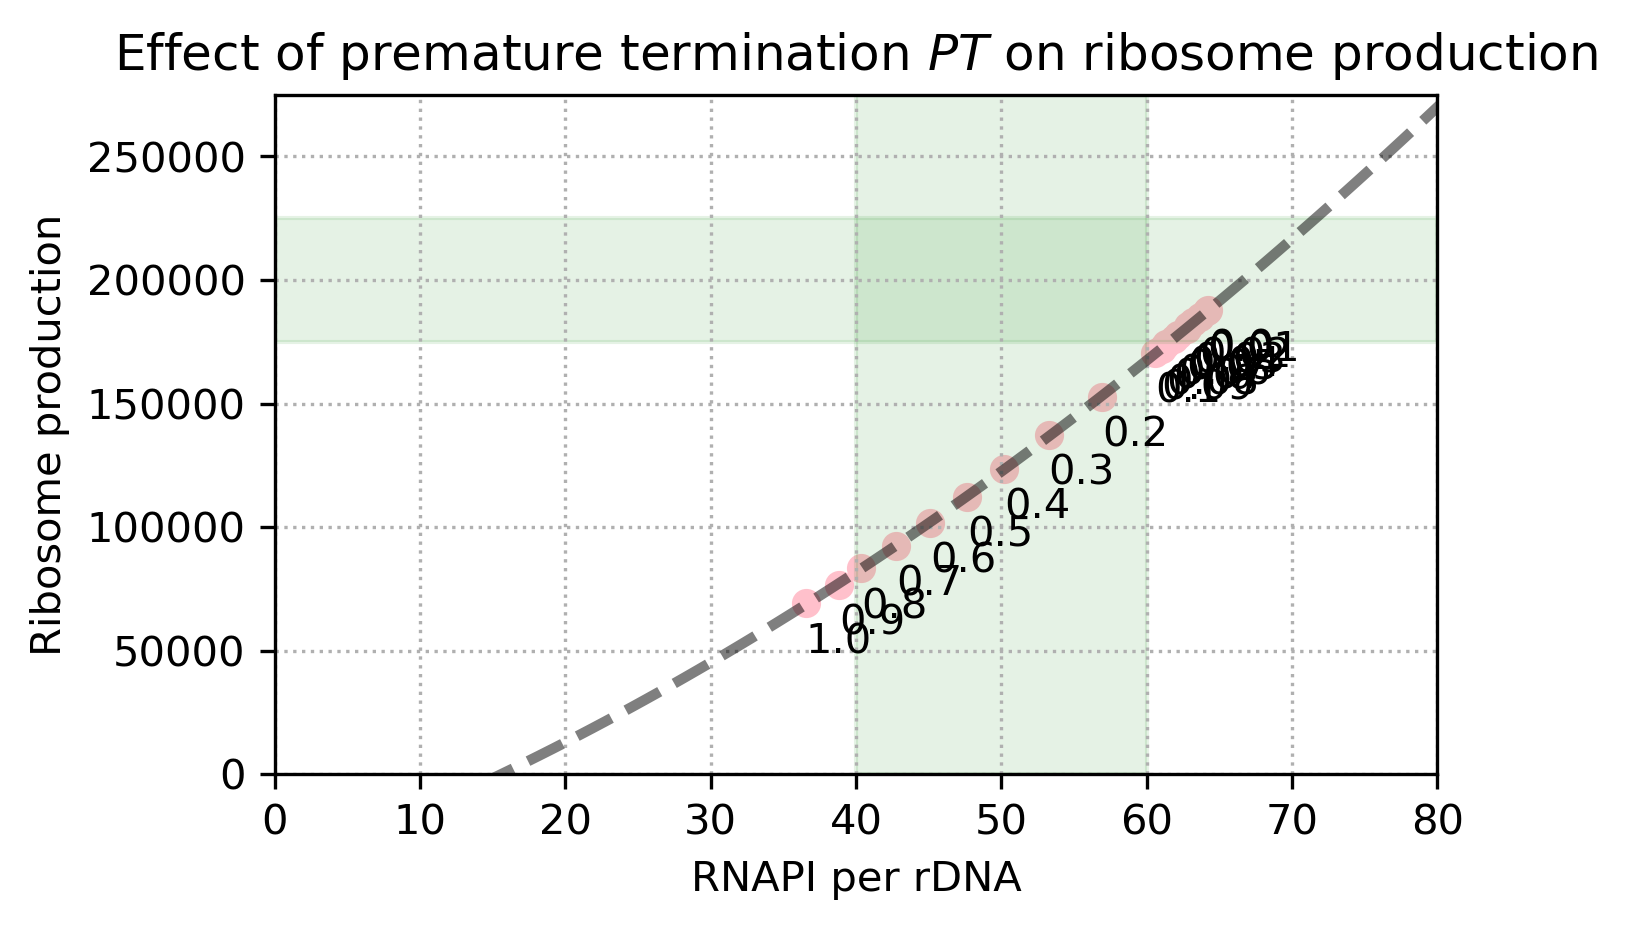

In [49]:
figsize=(5,3)
dpi=300

fig = plt.figure(figsize=figsize, dpi=dpi)
ax1 = fig.add_subplot()

x = d['nParticles'].tolist()
y = d['xEnd'].tolist()

ax1.scatter(x ,y, color='pink')

#points labels
s = [str(i) for i in d['preTermProb'].tolist()]
for t in zip(x,y,s):
    ax1.text(t[0],t[1]-20000,t[2])

# fit regression line
z = np.polyfit(x, y, deg=2)
p2 = np.poly1d(z)

# Plot regression line
xseq = np.linspace(0, 90, num=100)
ax1.plot(xseq, p2(xseq), "--", color="k", lw=2.5, alpha=0.5)
    
ax1.set_xlim(0,80)
ax1.set_ylim(0,275000)

ax1.axvspan(40,60,color='green',alpha=0.1)
ax1.axhspan(175000,225000,color='green',alpha=0.1)

ax1.grid(True,ls="dotted")
ax1.set_xlabel('RNAPI per rDNA')
ax1.set_ylabel('Ribosome production')
plt.title('Effect of premature termination '+'$\it{PT}$'+' on ribosome production')
plt.savefig(fname="Fig_N_A.png",dpi=dpi,format='png',bbox_inches='tight', transparent=False)